In [13]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np

phase3_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 3")
with open('phase3_collection.pkl','wb') as file:
    pickle.dump(phase3_collection, file)



In [14]:
with open('phase3_collection.pkl', 'rb') as file:
    phase3_collection = pickle.load(file)
phase3_collection.collection.keys()

dict_keys(['20230809_103121_1_merged.rec', '20230809_143303_1_merged.rec', '20230810_101534_1_merged.rec', '20230810_120856_1_merged.rec', '20230810_140909_1_merged.rec', '20230811_101635_1_merged.rec', '20230811_120331_merged.rec', '20230811_154219_1_merged.rec'])

In [88]:
p3d1_1_1 = phase3_collection.get_by_name('20230809_103121_1_merged.rec')
#p3d1_1_2 was only half as long so we will not do ephys data analysis on it 
p3d1_1_4 = phase3_collection.get_by_name('20230809_143303_1_merged.rec')

p3d2_1_1 = phase3_collection.get_by_name('20230810_101534_1_merged.rec')
p3d2_1_2 = phase3_collection.get_by_name('20230810_120856_1_merged.rec')
p3d2_1_4 = phase3_collection.get_by_name('20230810_140909_1_merged.rec')

p3d3_1_1 = phase3_collection.get_by_name('20230811_101635_1_merged.rec')
p3d3_1_2 = phase3_collection.get_by_name('20230811_120331_merged.rec')
p3d3_1_4 = phase3_collection.get_by_name('20230811_154219_1_merged.rec')


p3d1_1_1.subject = '1.1'
p3d1_1_4.subject = '1.4'
p3d2_1_1.subject = '1.1'
p3d2_1_2.subject = '1.2'
p3d2_1_4.subject = '1.4'
p3d3_1_1.subject = '1.1'
p3d3_1_2.subject = '1.2'
p3d3_1_4.subject = '1.4'


In [89]:
p3d1_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_103121_1_merged.rec\\20230809_103121_1.1_1t1bL_p3d1.xlsx")

p3d1_1_1_df = p3d1_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

last10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] > 1939]
first10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] < 601]
familiarization_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] < 1258) & (p3d1_1_1_df['Start (s)'] > 675)]
ITI_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] > 1271) & (p3d1_1_1_df['Start (s)'] < 1860)]

novel_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
fam_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cagemate_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
empty_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

#cup3_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famempty_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
famfam_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1],['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

In [90]:
p3d1_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_143303_1_merged.rec\\20230809_143303_1.4_3t3bL_p3d1.xlsx")

p3d1_1_4_df = p3d1_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] > 1920]
first10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] < 602]
familiarization_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] < 1234) & (p3d1_1_4_df['Start (s)'] > 629)]
ITI_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] > 1260) & (p3d1_1_4_df['Start (s)'] < 1856)]
novel_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
fam_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cagemate_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
empty_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup3_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famcup3_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
famfam_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIcup3_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

In [91]:
p3d2_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_101534_1_merged.rec\\20230810_101534_1.1_p3d2.xlsx")

p3d2_1_1_df = p3d2_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] > 1926]
first10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] < 600]
familiarization_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] < 1216) & (p3d2_1_1_df['Start (s)'] > 612)]
ITI_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] > 1222) & (p3d2_1_1_df['Start (s)'] < 1821)]

novel_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
fam_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cagemate_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
empty_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

#cup3_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

In [92]:
p3d2_1_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_120856_1_merged.rec\\20230810_120856_1.2_p3d2.xlsx")

p3d2_1_2_df = p3d2_1_2_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] > 2049]
first10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] < 723]
familiarization_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] < 1351) & (p3d2_1_2_df['Start (s)'] > 734)]
ITI_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] > 1373) & (p3d2_1_2_df['Start (s)'] < 1950)]

novel_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
fam_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cagemate_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
empty_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

#cup3_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)


In [93]:
p3d2_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_140909_1_merged.rec\\20230810_140909_1.4_p3d2.xlsx")

p3d2_1_4_df = p3d2_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] > 1912]
first10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] < 621]
familiarization_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] < 1221) & (p3d2_1_4_df['Start (s)'] > 635)]
ITI_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] > 1234) & (p3d2_1_4_df['Start (s)'] < 1836)]

novel_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
fam_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
cagemate_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
empty_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

#cup3_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

In [94]:
p3d3_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_101635_1_merged.rec\\1.1_p3d3.xlsx")

p3d3_1_1_df = p3d3_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] > 1903]
first10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] < 601]
familiarization_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] < 1208) & (p3d3_1_1_df['Start (s)'] > 608)]
ITI_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] > 1221) & (p3d3_1_1_df['Start (s)'] < 1809)]
novel_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
fam_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cagemate_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
empty_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
#cup3_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famcup3_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
ITIcup3_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

In [95]:
# 2572320.85 ms is the length of the recording of p3d3_1_2 
# media duration of second vid is 862200 ms
# diff in ms: 1710120.85
#this is the constant i add to every value in the array

p3d3_1_2_df1 = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_1.xlsx")
p3d3_1_2_df1 = p3d3_1_2_df1[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
first10min_1_2_df = p3d3_1_2_df1[p3d3_1_2_df1['Start (s)'] < 611]
familiarization_1_2_df = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] < 1230) & (p3d3_1_2_df1['Start (s)'] > 628)]
ITI_1_2_df1 = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] > 1244)]

#cup3_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
#cup2_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
famfam_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
ITIcup3_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

p3d3_1_2_df2 = pd.read_excel("D:\\social_ephys_pilot2_cum\proc\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_2.xlsx")
p3d3_1_2_df2 = p3d3_1_2_df2[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_1_2_df = p3d3_1_2_df2[p3d3_1_2_df2['Start (s)'] > 259]
ITI_1_2_df2 = p3d3_1_2_df2[(p3d3_1_2_df2['Start (s)'] < 134)]

ITIcup3_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)

novel_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
fam_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
cagemate_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
empty_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d3_1_2_array2 = ITIcup3_p3d3_1_2_array2 + 1710120.85
ITIfamcup_p3d3_1_2_array2 = ITIfamcup_p3d3_1_2_array2 + 1710120.85

novel_p3d3_1_2_array = novel_p3d3_1_2_array + 1710120.85
fam_p3d3_1_2_array = fam_p3d3_1_2_array + 1710120.85
cagemate_p3d3_1_2_array = cagemate_p3d3_1_2_array + 1710120.85
empty_p3d3_1_2_array = empty_p3d3_1_2_array + 1710120.85

ITIcup3_p3d3_1_2_array = np.concatenate([ITIcup3_p3d3_1_2_array1, ITIcup3_p3d3_1_2_array2])
ITIfamcup_p3d3_1_2_array = np.concatenate([ITIfamcup_p3d3_1_2_array1, ITIfamcup_p3d3_1_2_array2])



In [96]:
p3d3_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_154219_1_merged.rec\\20230811_154219_1.4_3t3bL_p3d3.xlsx")

p3d3_1_4_df = p3d3_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] > 1910]
first10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] < 605]
familiarization_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] < 1201) & (p3d3_1_4_df['Start (s)'] > 625)]
ITI_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] > 1211) & (p3d3_1_4_df['Start (s)'] < 1837)]

novel_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti = 2, min_bout = 0.5)
fam_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)
cagemate_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
empty_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)

#cup3_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
#cup4_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
cup1_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti = 2, min_bout = 0.5)
#cup2_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

famcup3_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
famfam_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

ITIcup3_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti = 2, min_bout = 0.5)
ITIfamcup_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti = 2, min_bout = 0.5)

In [97]:

# events_p3d1_1_1 = {'cup 1': cup1_p3d1_1_1_array, 'cup 2': cup2_p3d1_1_1_array,
#                    'cup 3': cup3_p3d1_1_1_array,'cup 4': cup4_p3d1_1_1_array,
#                    'empty cup': famempty_p3d1_1_1_array, 'first fam': famfam_p3d1_1_1_array,
#                    'empty ITI cup': ITIcup3_p3d1_1_1_array, 'ITI fam cup': ITIfamcup_p3d1_1_1_array,
#                    'cagemate': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
#                    'novel': novel_p3d1_1_1_array, 'familiar': fam_p3d1_1_1_array}
# events_p3d1_1_4 = {'cup 1': cup1_p3d1_1_4_array, 'cup 2': cup2_p3d1_1_4_array,
#                    'cup 3': cup3_p3d1_1_4_array,'cup 4': cup4_p3d1_1_4_array,
#                    'empty cup': famcup3_p3d1_1_4_array, 'first fam': famfam_p3d1_1_4_array,
#                    'empty ITI cup': ITIcup3_p3d1_1_4_array, 'ITI fam cup': ITIfamcup_p3d1_1_4_array,
#                    'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
#                    'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}

# events_p3d2_1_1 = {'cup 1': cup1_p3d2_1_1_array, 'cup 2': cup2_p3d2_1_1_array,
#                    'cup 3': cup3_p3d2_1_1_array,'cup 4': cup4_p3d2_1_1_array,
#                    'empty cup': famcup3_p3d2_1_1_array, 'first fam': famfam_p3d2_1_1_array,
#                    'empty ITI cup': ITIcup3_p3d2_1_1_array, 'ITI fam cup': ITIfamcup_p3d2_1_1_array,
#                    'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
#                    'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
# events_p3d2_1_2 = {'cup 1': cup1_p3d2_1_2_array, 'cup 2': cup2_p3d2_1_2_array,
#                    'cup 3': cup3_p3d2_1_2_array,'cup 4': cup4_p3d2_1_2_array,
#                    'empty cup': famcup3_p3d2_1_2_array, 'first fam': famfam_p3d2_1_2_array,
#                    'empty ITI cup': ITIcup3_p3d2_1_2_array, 'ITI fam cup': ITIfamcup_p3d2_1_2_array,
#                    'cagemate': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
#                    'novel': novel_p3d2_1_2_array, 'familiar': fam_p3d2_1_2_array}
# events_p3d2_1_4 = {'cup 1': cup1_p3d2_1_4_array, 'cup 2': cup2_p3d2_1_4_array,
#                    'cup 3': cup3_p3d2_1_4_array,'cup 4': cup4_p3d2_1_4_array,
#                    'empty cup': famcup3_p3d2_1_4_array, 'first fam': famfam_p3d2_1_4_array,
#                    'empty ITI cup': ITIcup3_p3d2_1_4_array, 'ITI fam cup': ITIfamcup_p3d2_1_4_array,
#                    'cagemate': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
#                    'novel': novel_p3d2_1_4_array, 'familiar': fam_p3d2_1_4_array}

# events_p3d3_1_1 = { 'cup 1':cup1_1_1_array, 'cup 2':cup2_1_1_array, 
#                    'cup 3':cup3_1_1_array, 'cup 4': cup4_1_1_array, 
#                    'empty cup':famcup3_1_1_array, 'first fam': famfam_1_1_array,  
#                    'empty ITI cup': ITIcup3_1_1_array, 'ITI fam cup':ITIfamcup_1_1_array, 
#                    'cagemate':cagemate_1_1_array,'empty':empty_1_1_array,
#                    'novel':novel_1_1_array,'familiar':fam_1_1_array}
# events_p3d3_1_2 = {'cup 1': cup1_p3d3_1_2_array, 'cup 2': cup2_p3d3_1_2_array,
#                    'cup 3': cup3_p3d3_1_2_array,'cup 4': cup4_p3d3_1_2_array,
#                    'empty cup': famcup3_p3d3_1_2_array, 'first fam': famfam_p3d3_1_2_array,
#                    'empty ITI cup': ITIcup3_p3d3_1_2_array, 'ITI fam cup': ITIfamcup_p3d3_1_2_array,
#                    'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
#                    'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
# events_p3d3_1_4 = {'cup 1': cup1_p3d3_1_4_array, 'cup 2': cup2_p3d3_1_4_array,
#                    'cup 3': cup3_p3d3_1_4_array,'cup 4': cup4_p3d3_1_4_array,
#                    'empty cup': famcup3_p3d3_1_4_array, 'first fam': famfam_p3d3_1_4_array,
#                    'empty ITI cup': ITIcup3_p3d3_1_4_array, 'ITI fam cup': ITIfamcup_p3d3_1_4_array,
#                    'cagemate': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
#                    'novel': novel_p3d3_1_4_array, 'familiar': fam_p3d3_1_4_array}


In [102]:
events_p3d1_1_1 = {'baseline empty cup': cup1_p3d1_1_1_array,
                   'empty cup': famempty_p3d1_1_1_array, 'acquisition': famfam_p3d1_1_1_array,
                   'empty ITI cup': ITIcup3_p3d1_1_1_array, 'fam ITI cup': ITIfamcup_p3d1_1_1_array,
                   'cagemate': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
                   'novel': novel_p3d1_1_1_array, 'familiar': fam_p3d1_1_1_array}
events_p3d1_1_4 = {'baseline empty cup': cup1_p3d1_1_4_array, 
                   'empty cup': famcup3_p3d1_1_4_array, 'acquisition': famfam_p3d1_1_4_array,
                   'empty ITI cup': ITIcup3_p3d1_1_4_array, 'fam ITI cup': ITIfamcup_p3d1_1_4_array,
                   'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
                   'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}

events_p3d2_1_1 = {'baseline empty cup': cup1_p3d2_1_1_array,
                   'empty cup': famcup3_p3d2_1_1_array, 'acquisition': famfam_p3d2_1_1_array,
                   'empty ITI cup': ITIcup3_p3d2_1_1_array, 'fam ITI cup': ITIfamcup_p3d2_1_1_array,
                   'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
                   'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
events_p3d2_1_2 = {'baseline empty cup': cup1_p3d2_1_2_array,
                   'empty cup': famcup3_p3d2_1_2_array, 'acquisition': famfam_p3d2_1_2_array,
                   'empty ITI cup': ITIcup3_p3d2_1_2_array, 'fam ITI cup': ITIfamcup_p3d2_1_2_array,
                   'cagemate': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
                   'novel': novel_p3d2_1_2_array, 'familiar': fam_p3d2_1_2_array}
events_p3d2_1_4 = {'baseline empty cup': cup1_p3d2_1_4_array, 
                   'empty cup': famcup3_p3d2_1_4_array, 'acquisition': famfam_p3d2_1_4_array,
                   'empty ITI cup': ITIcup3_p3d2_1_4_array, 'fam ITI cup': ITIfamcup_p3d2_1_4_array,
                   'cagemate': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
                   'novel': novel_p3d2_1_4_array, 'familiar': fam_p3d2_1_4_array}

events_p3d3_1_1 = { 'baseline empty cup':cup1_1_1_array, 
                   'empty cup':famcup3_1_1_array, 'acquisition': famfam_1_1_array,  
                   'empty ITI cup': ITIcup3_1_1_array, 'fam ITI cup':ITIfamcup_1_1_array, 
                   'cagemate':cagemate_1_1_array,'empty':empty_1_1_array,
                   'novel':novel_1_1_array,'familiar':fam_1_1_array}
events_p3d3_1_2 = {'baseline empty cup': cup1_p3d3_1_2_array, 
                   'empty cup': famcup3_p3d3_1_2_array, 'acquisition': famfam_p3d3_1_2_array,
                   'empty ITI cup': ITIcup3_p3d3_1_2_array, 'fam ITI cup': ITIfamcup_p3d3_1_2_array,
                   'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
                   'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
events_p3d3_1_4 = {'baseline empty cup': cup1_p3d3_1_4_array,
                   'empty cup': famcup3_p3d3_1_4_array, 'acquisition': famfam_p3d3_1_4_array,
                   'empty ITI cup': ITIcup3_p3d3_1_4_array, 'fam ITI cup': ITIfamcup_p3d3_1_4_array,
                   'cagemate': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
                   'novel': novel_p3d3_1_4_array, 'familiar': fam_p3d3_1_4_array}

In [103]:
p3d1_1_1.event_dict = events_p3d1_1_1
p3d1_1_4.event_dict = events_p3d1_1_4

p3d2_1_1.event_dict = events_p3d2_1_1
p3d2_1_2.event_dict = events_p3d2_1_2
p3d2_1_4.event_dict = events_p3d2_1_4

p3d3_1_1.event_dict = events_p3d3_1_1
p3d3_1_2.event_dict = events_p3d3_1_2
p3d3_1_4.event_dict = events_p3d3_1_4

In [125]:
phase3_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, 100, 50, 0.5)

All set to analyze


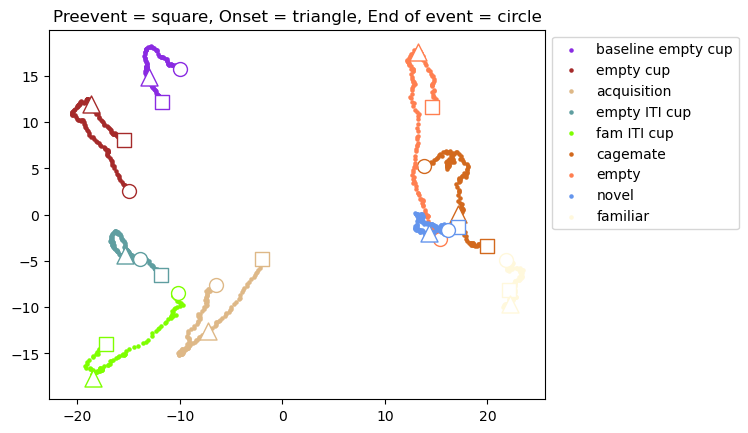

In [136]:
phase3_analysis.PCA_trajectories(5,2, d = 2)



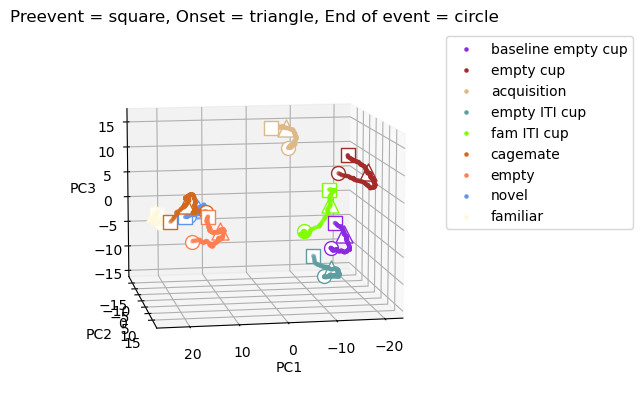

In [120]:
phase3_analysis.PCA_trajectories(5,2, d = 3, azim = 10, elev = 80)

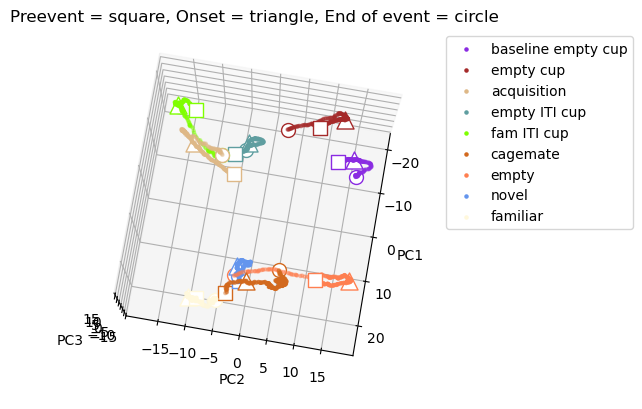

In [121]:
phase3_analysis.PCA_trajectories(5,2, d = 3, azim = 80, elev = 10) 

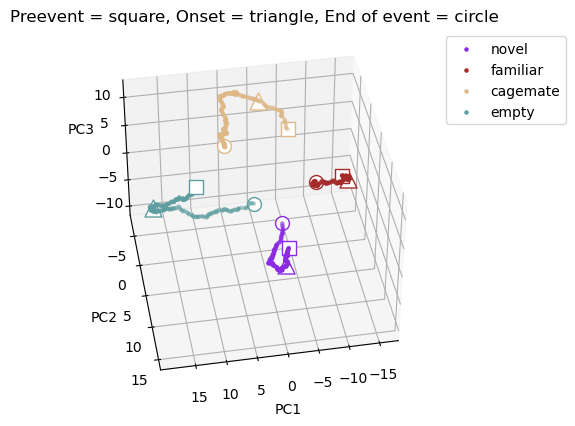

In [134]:
phase3_analysis.PCA_trajectories(5,2, events = ['novel', 'familiar', 'cagemate', 'empty'], d = 3, azim = 40, elev = 80)

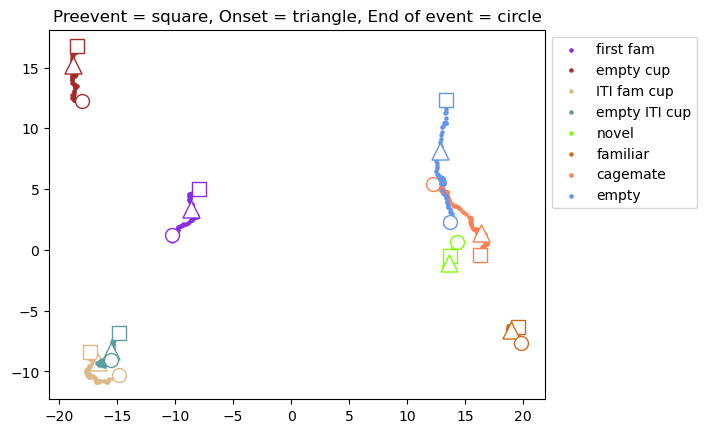

In [29]:
phase3_analysis.PCA_trajectories(5,2, events = ['first fam', 'empty cup', 'ITI fam cup', 'empty ITI cup', 'novel', 'familiar', 'cagemate', 'empty' ])

In [115]:
for event in ['novel', 'familiar', 'cagemate', 'empty']:
    phase3_analysis.wilcox_baseline_v_event_collection(event, 2, 5, plot = False)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

In [31]:
phase3_analysis.fishers_exact_wilcox('novel', 'empty', 5, 2)

(2.2564102564102564, 0.15582726771936872, [[13, 169], [6, 176]])

In [32]:
phase3_analysis.fishers_exact_wilcox('familiar', 'empty', 5, 2)

(1.5260115606936415, 0.5994715679677198, [[9, 173], [6, 176]])

In [33]:
phase3_analysis.fishers_exact_wilcox('familiar', 'novel', 2, 2)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.7558139534883721, 0.6674474417957368, [[10, 172], [13, 169]])

In [34]:
phase3_analysis.fishers_exact_wilcox('cagemate', 'novel', 2, 2)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.29213483146067415, 0.043907358543186926, [[4, 178], [13, 169]])

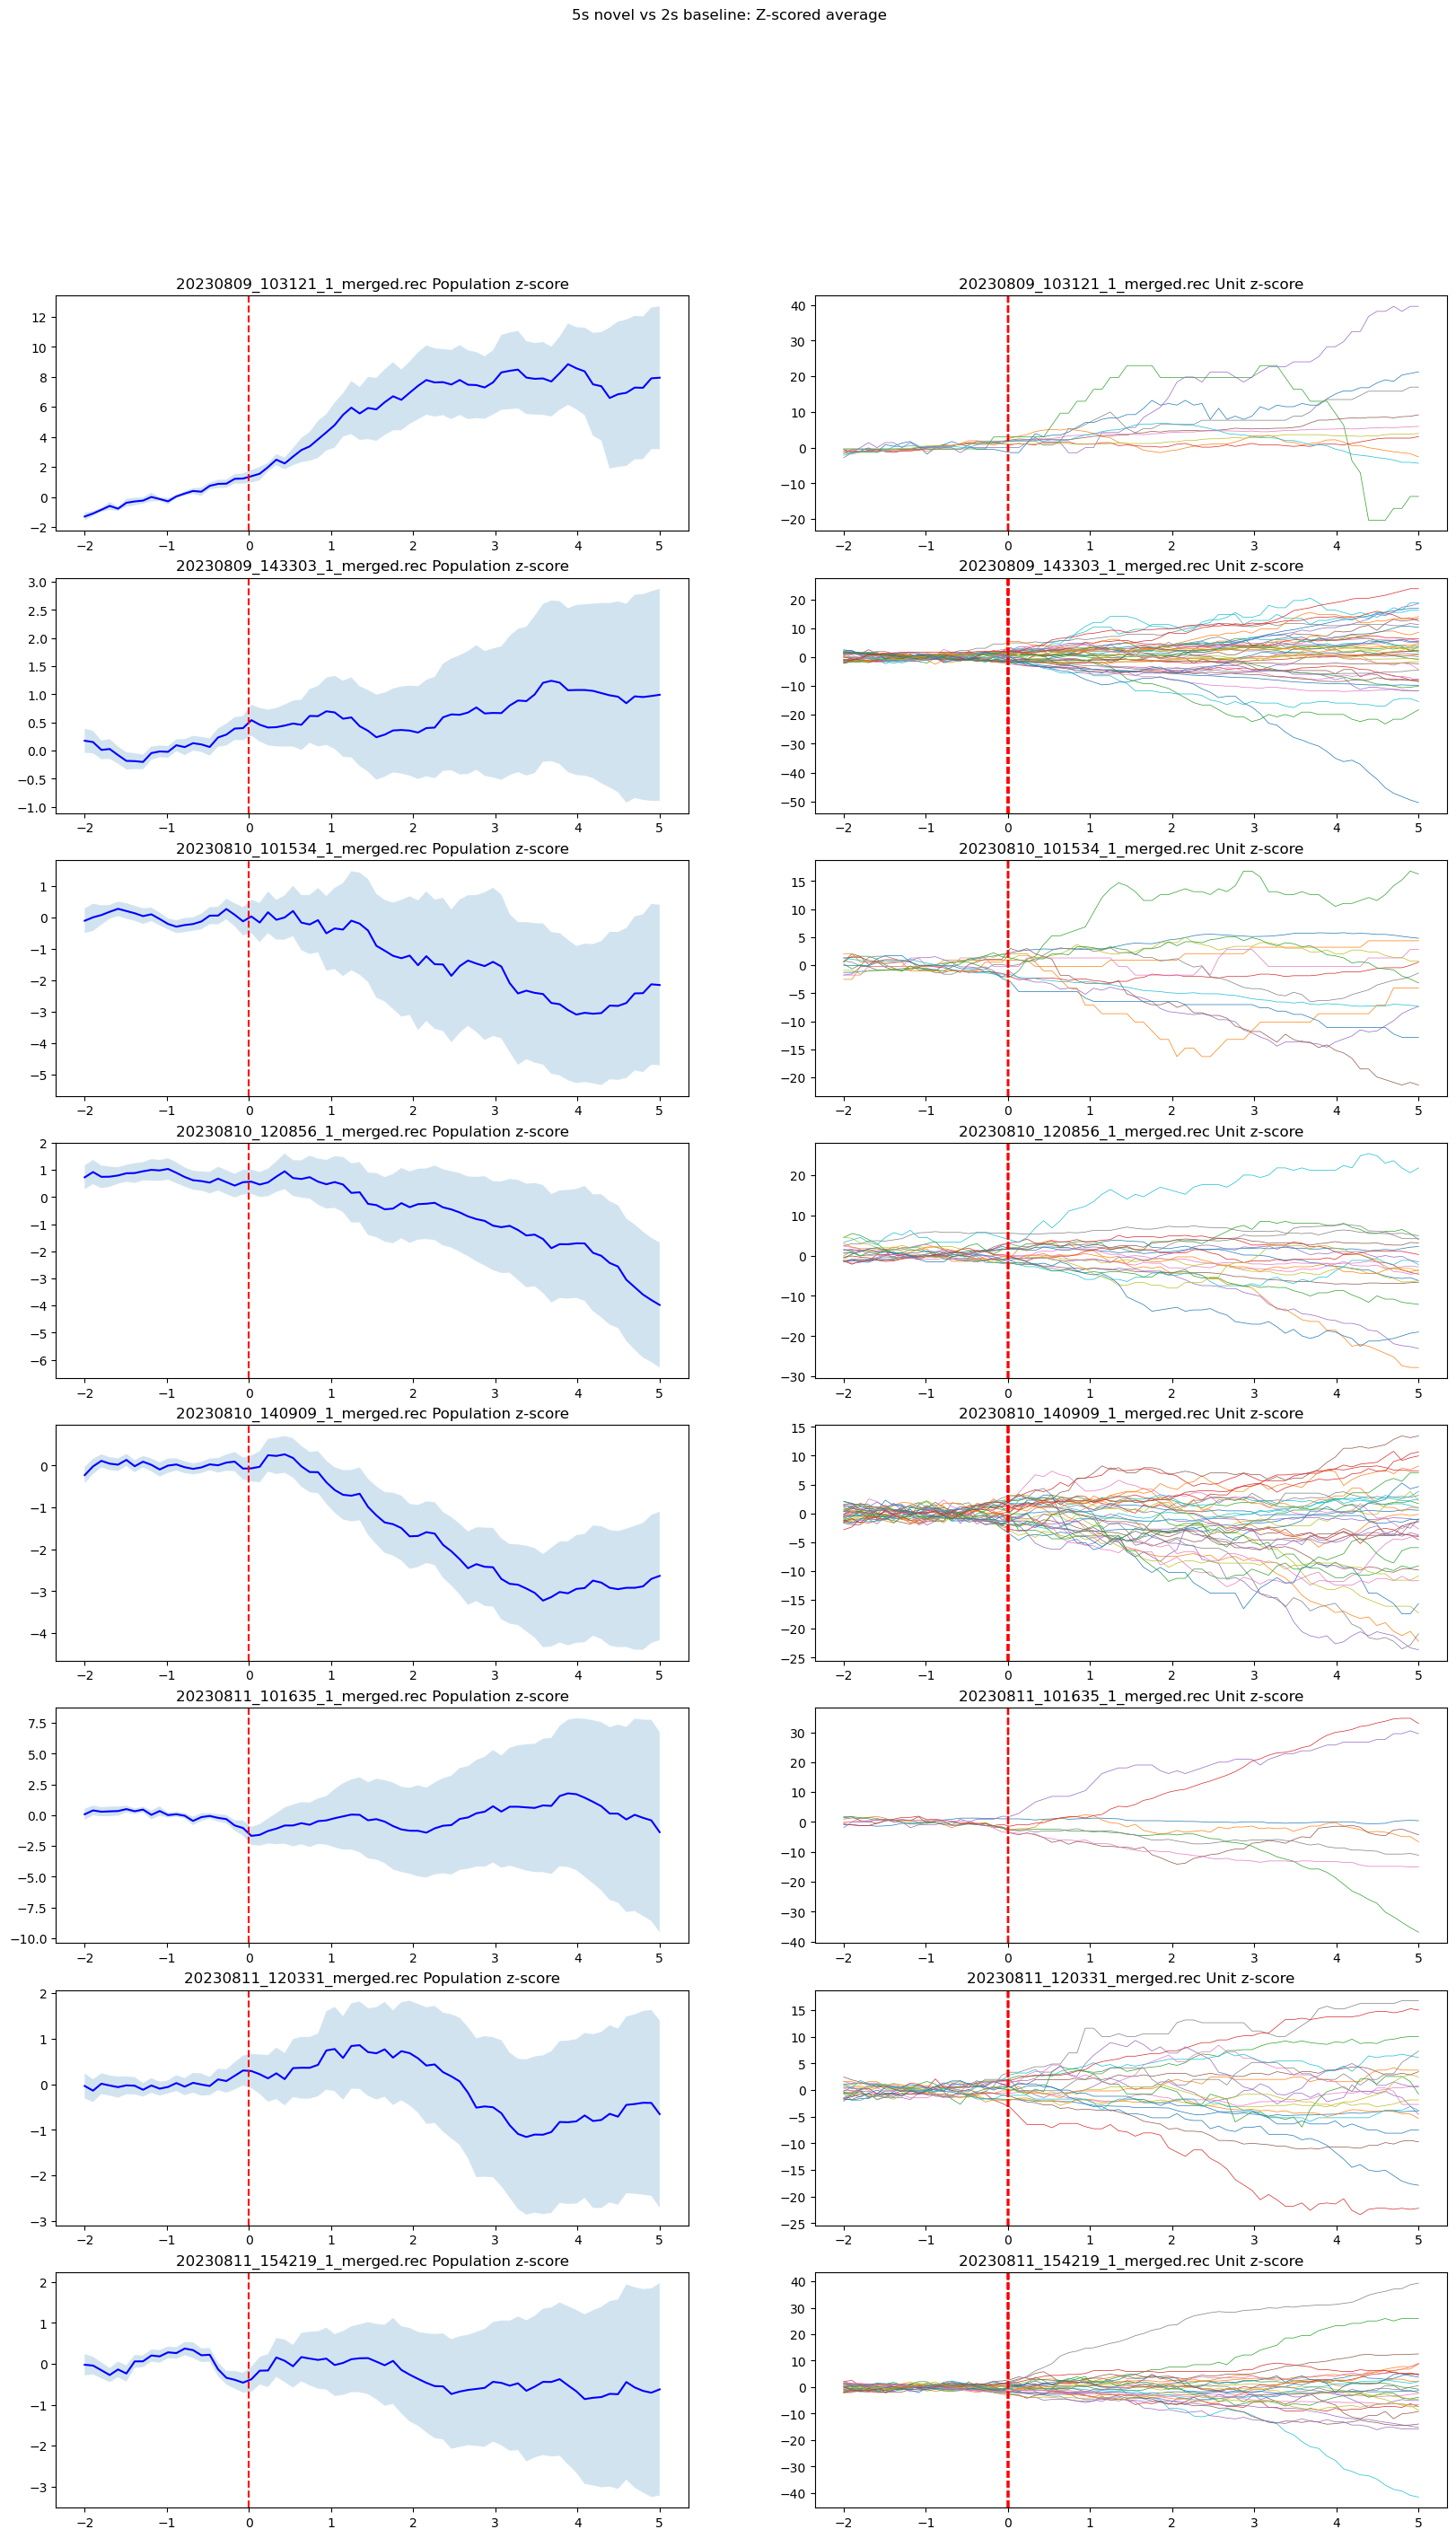

In [35]:
phase3_analysis.zscore_collection('novel', 2, 5)

In [117]:
phase3_analysis.wilcox_event_v_event_collection('baseline empty cup', 'cagemate', 5, 2, plot = False)

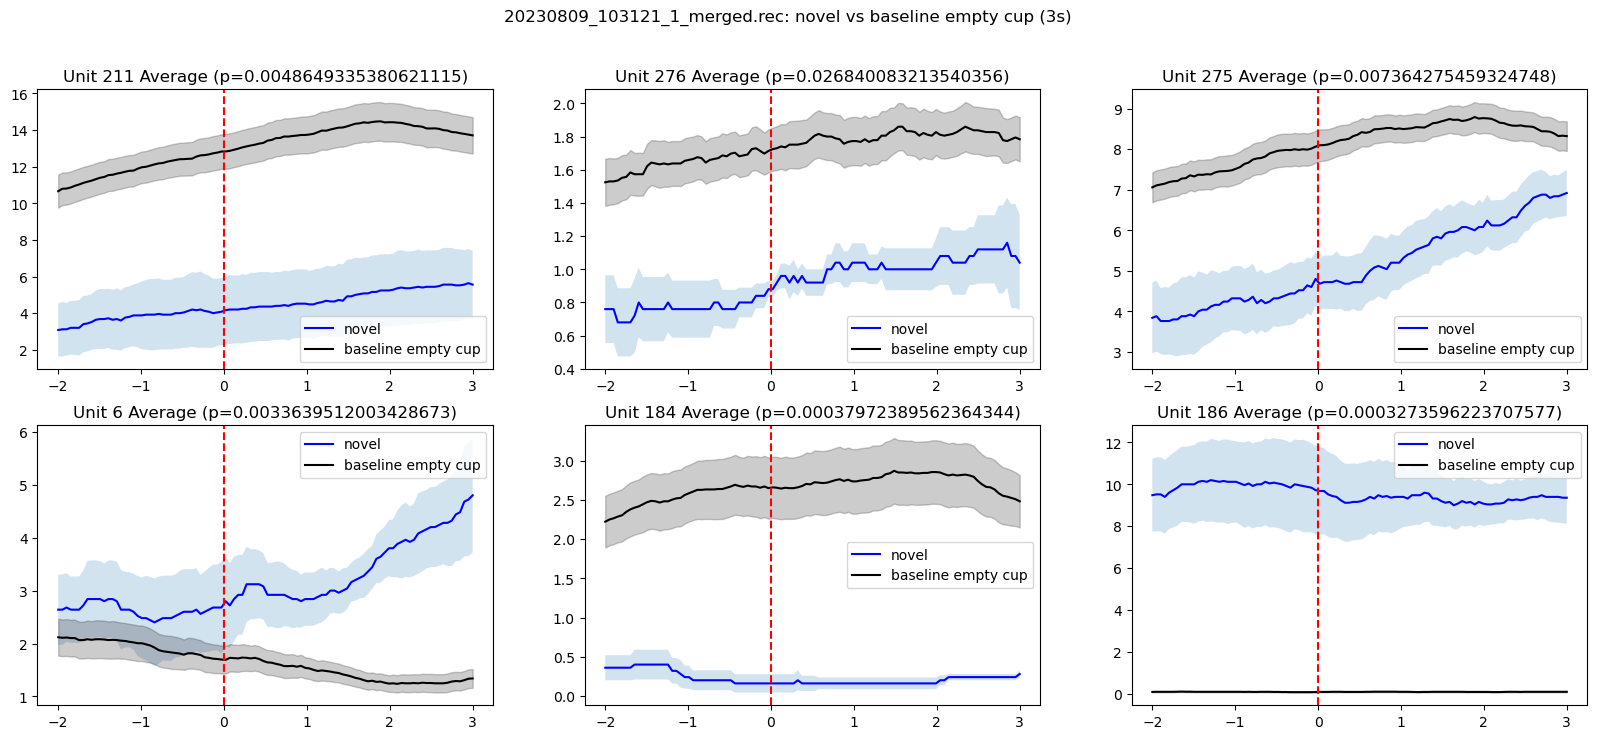

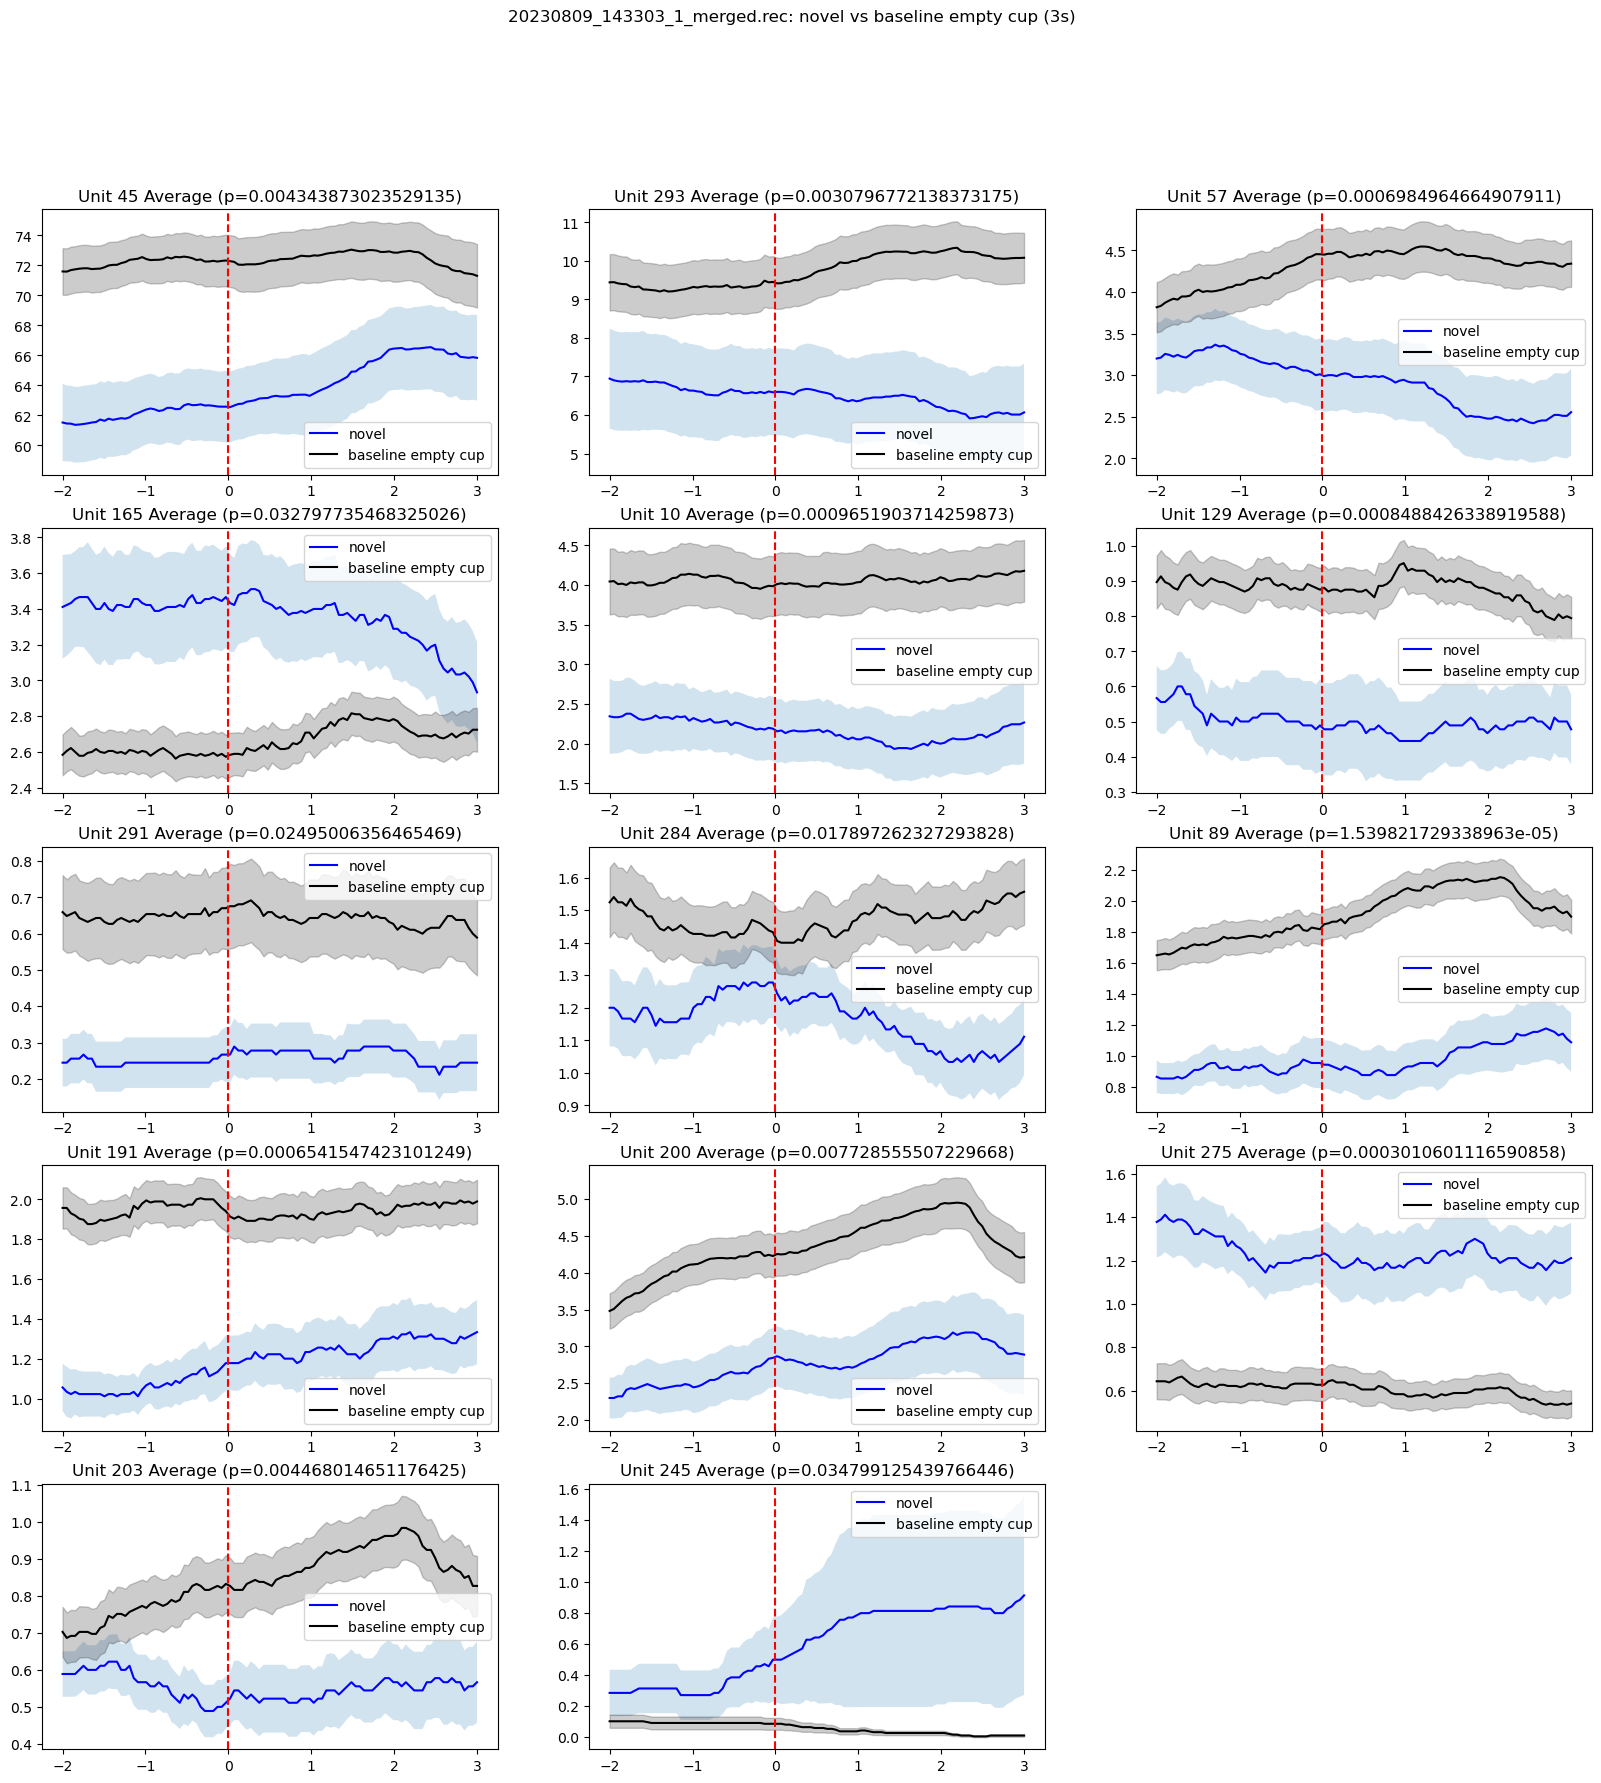

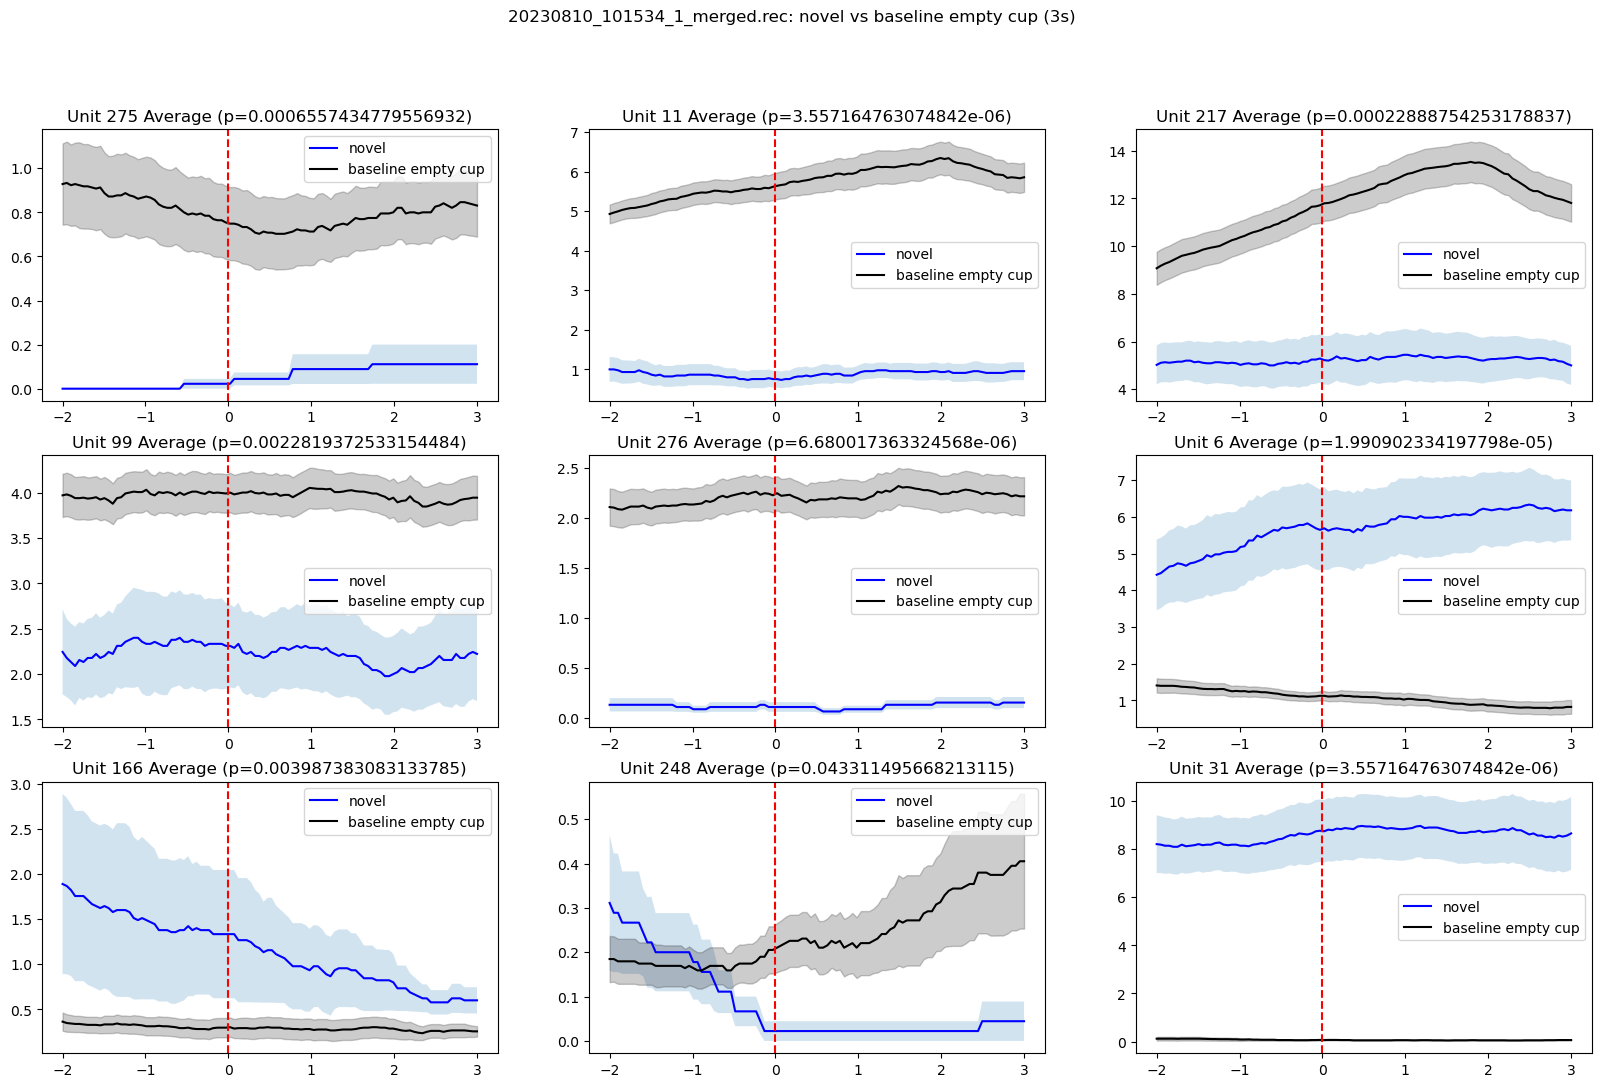

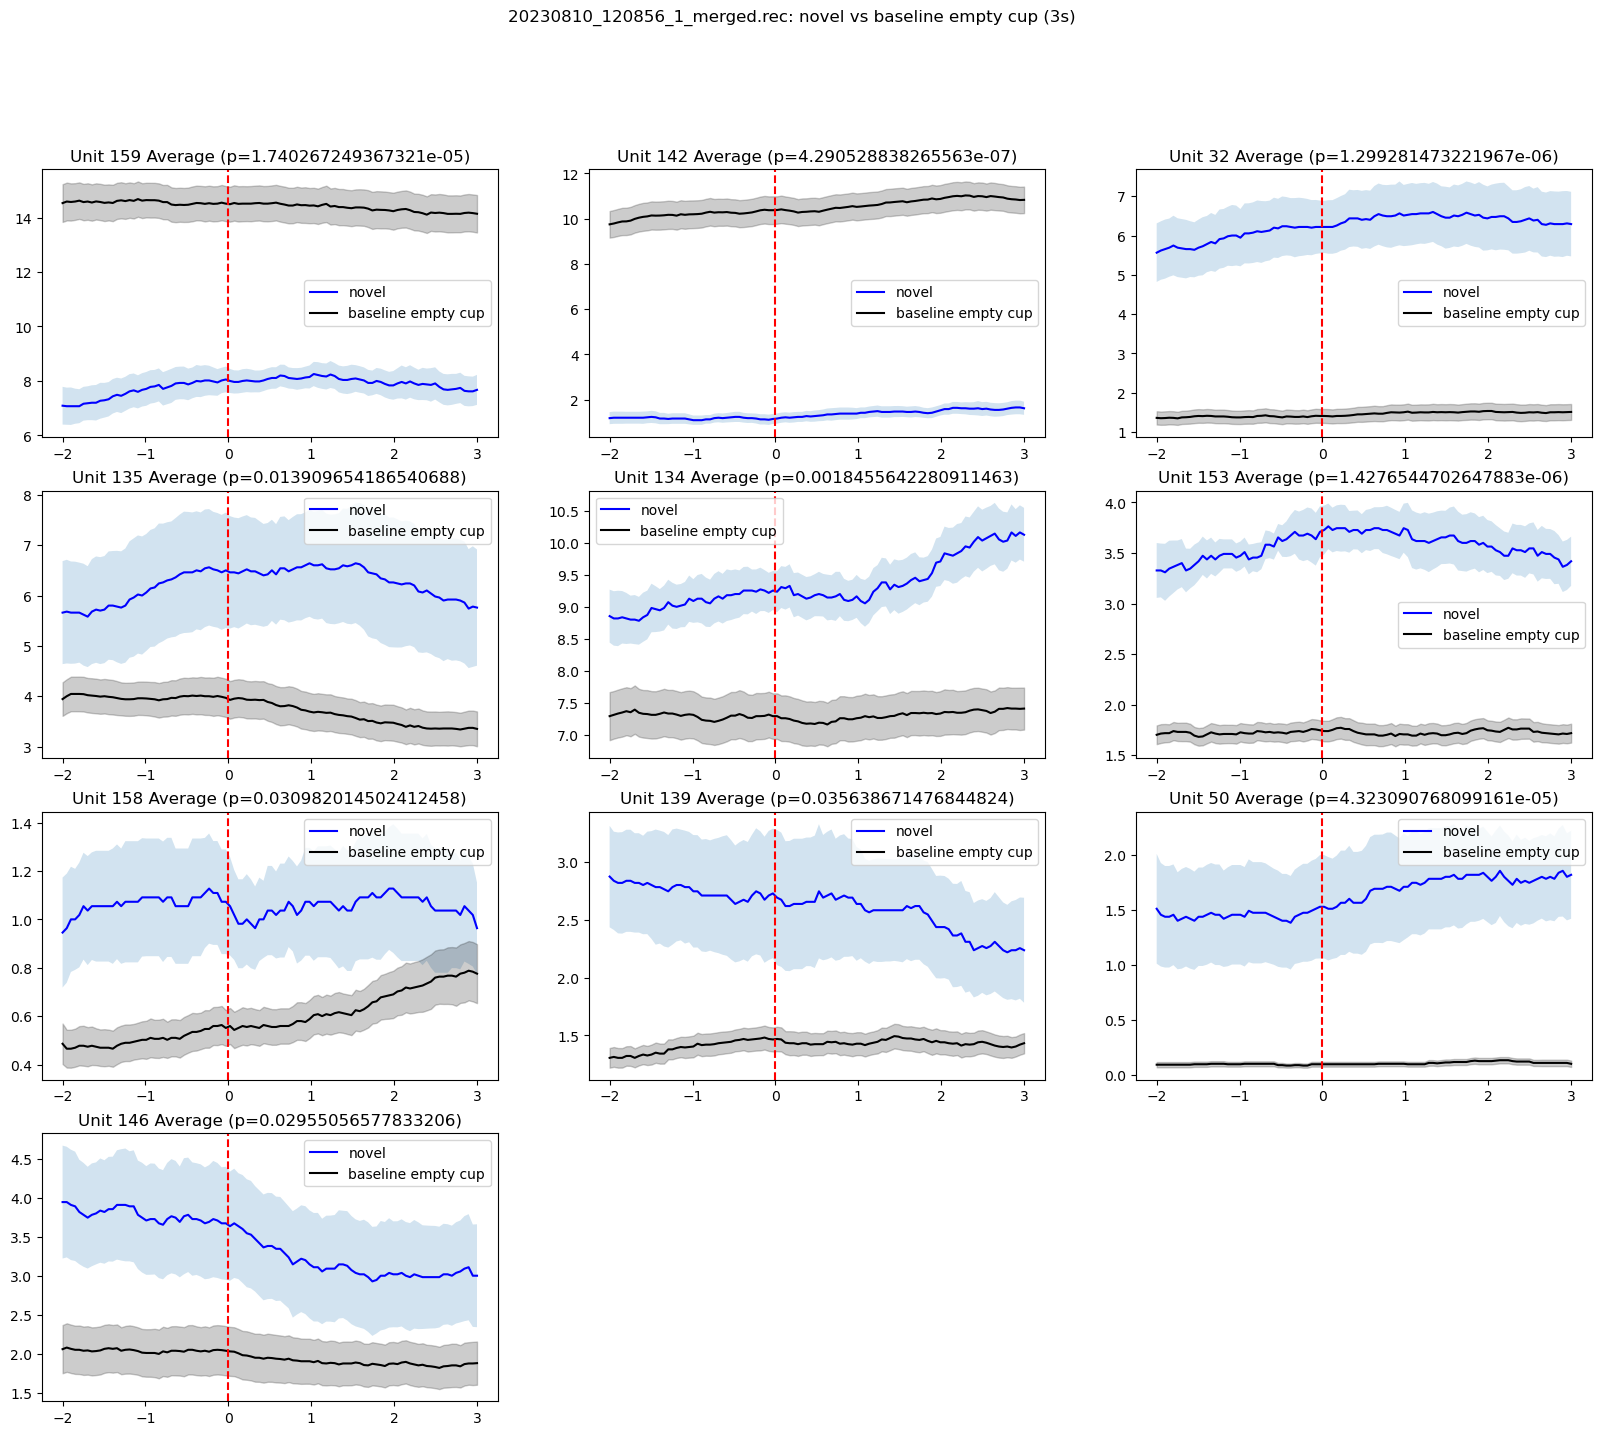

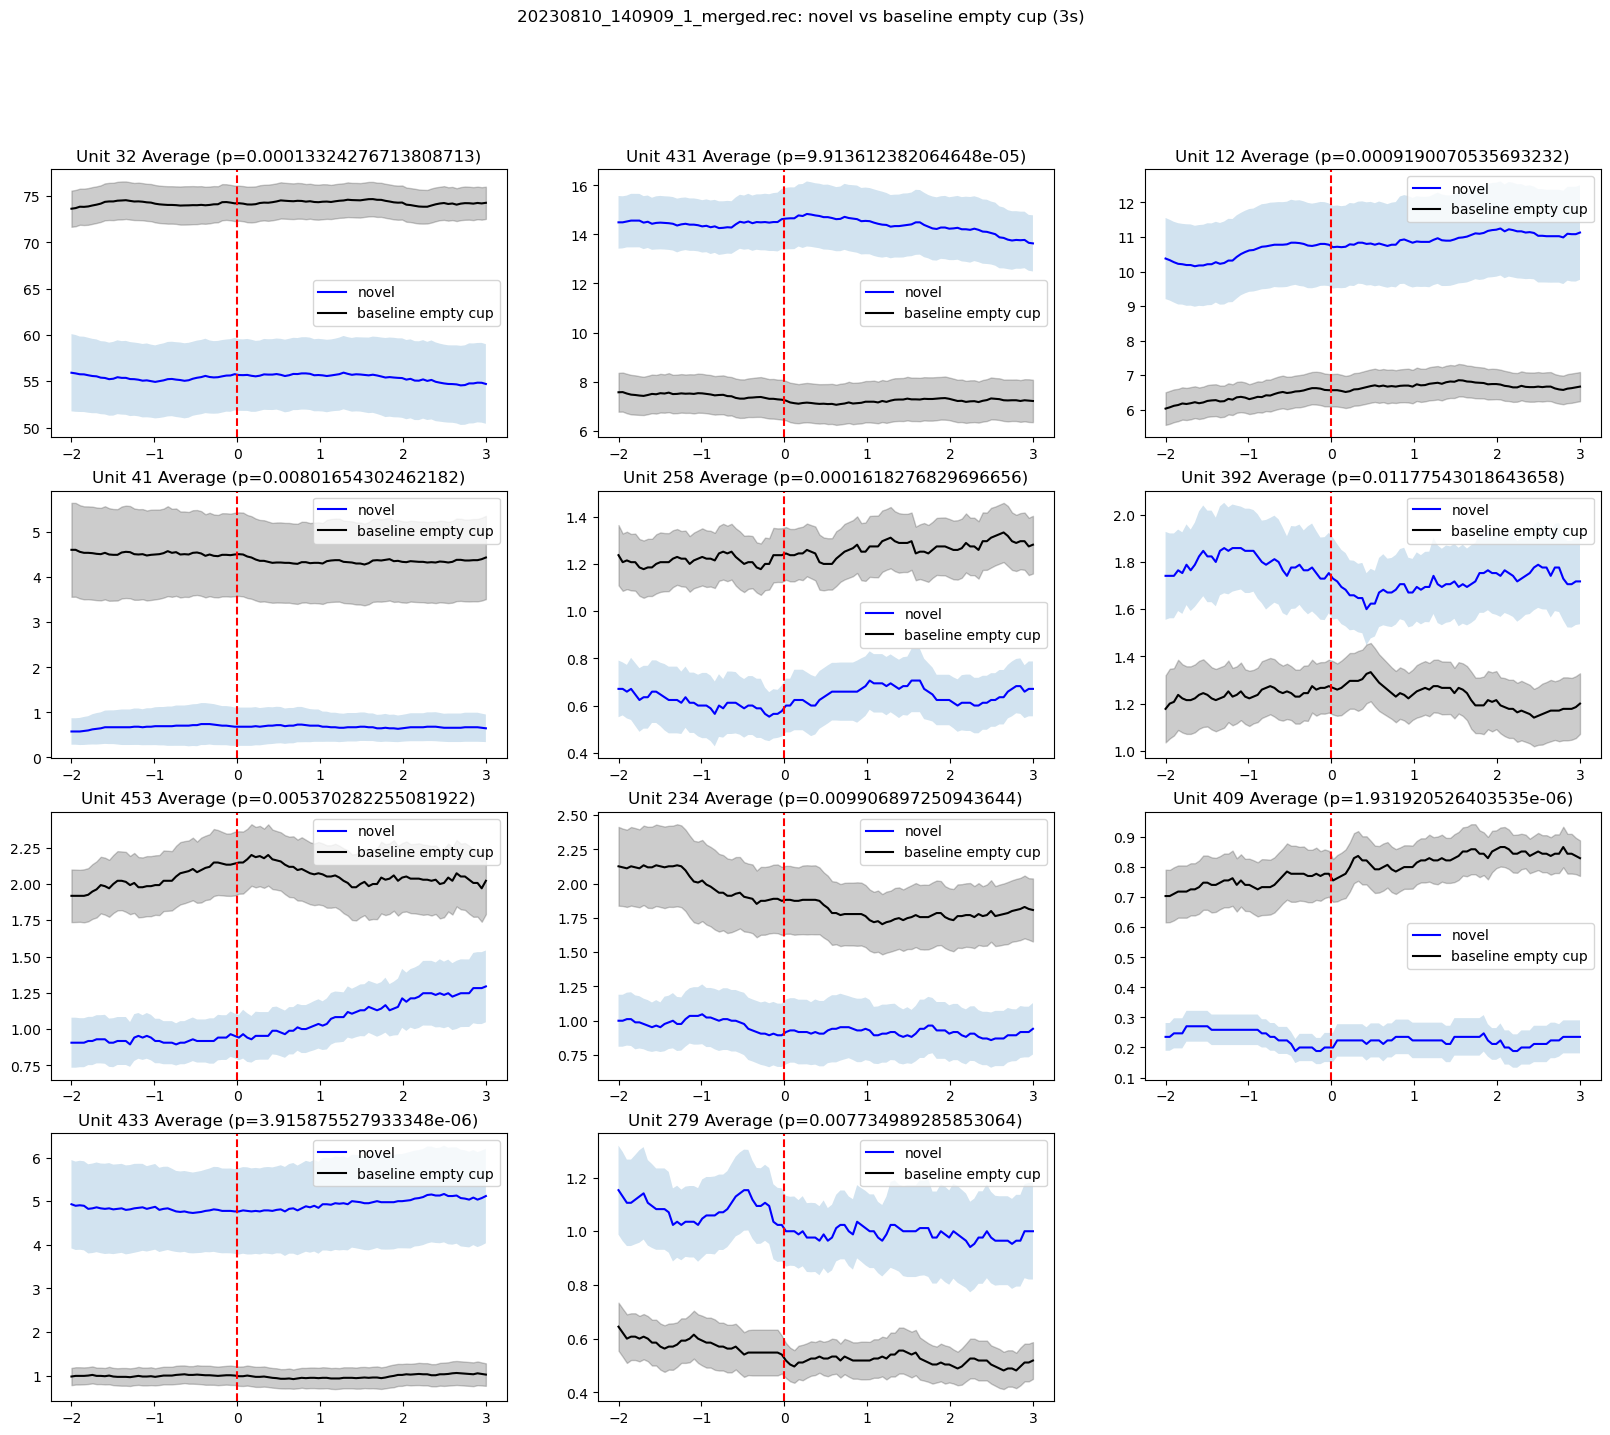

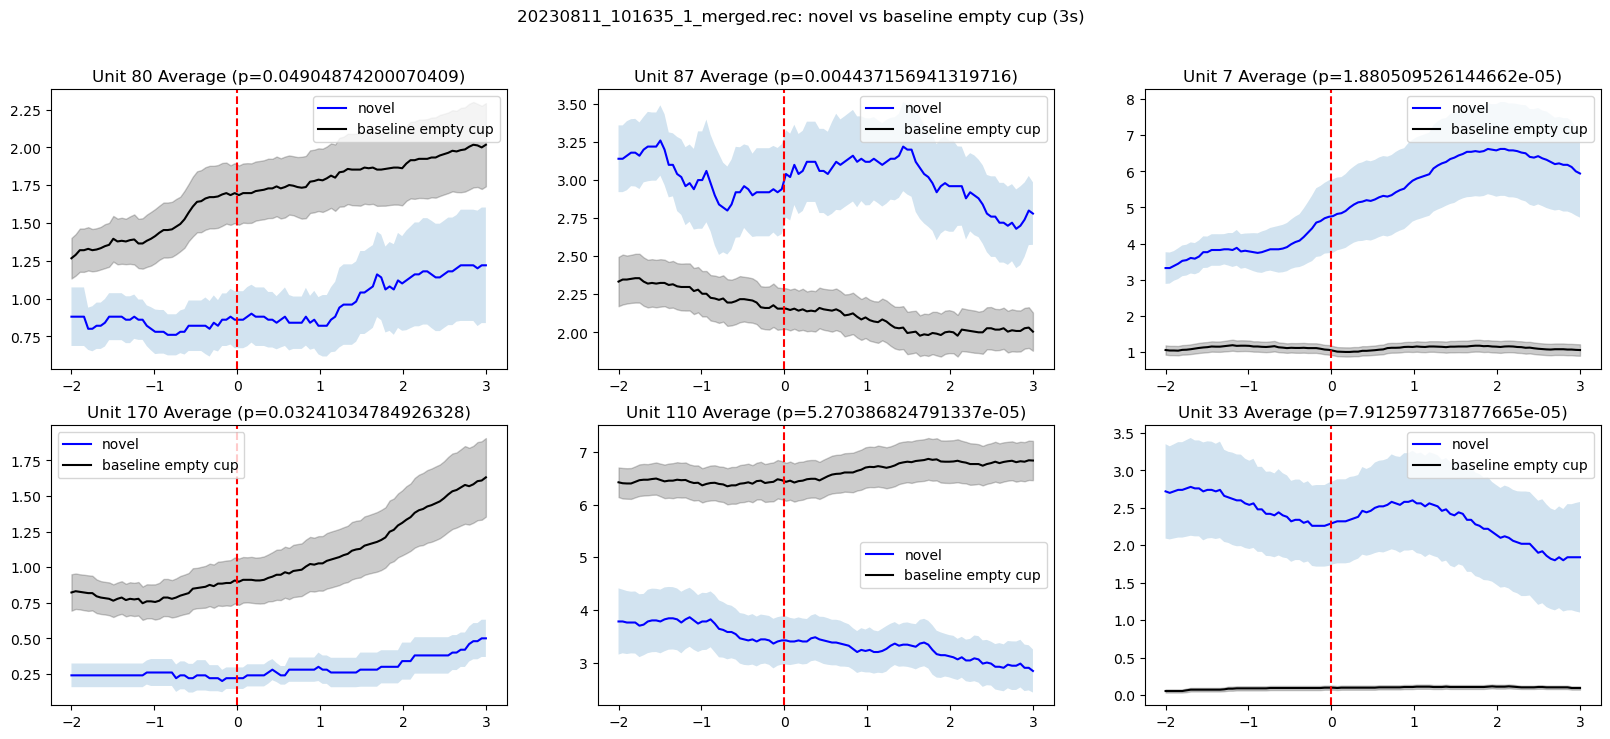

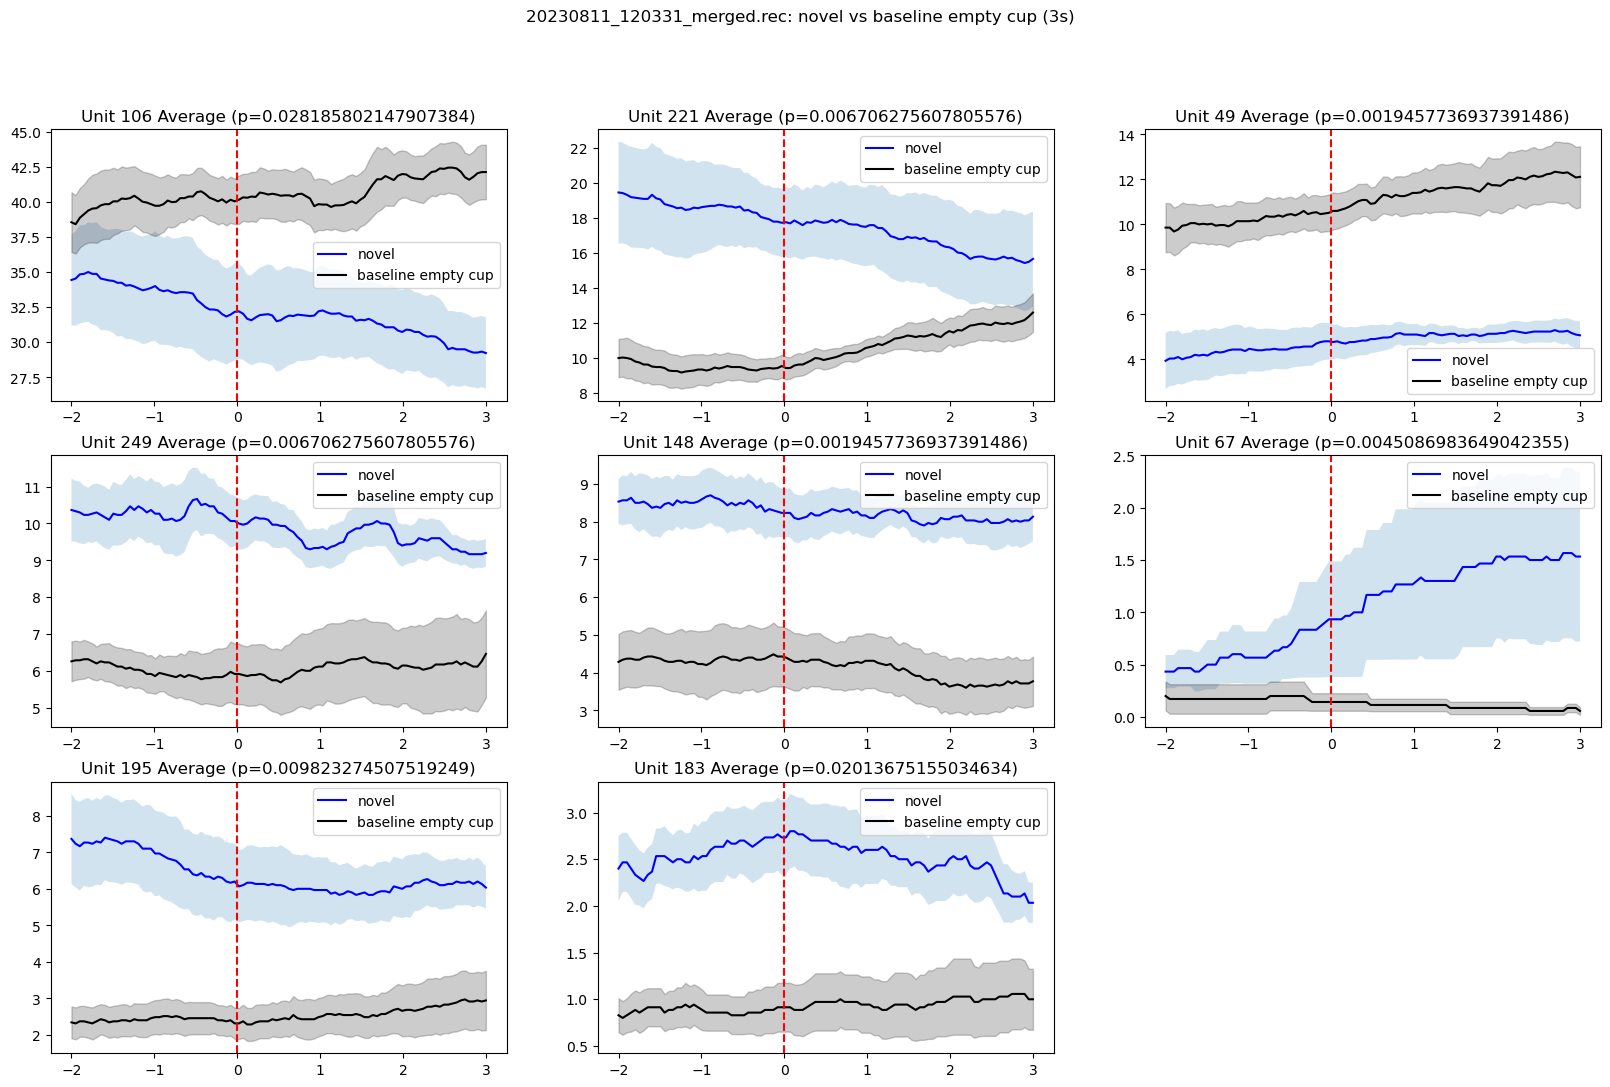

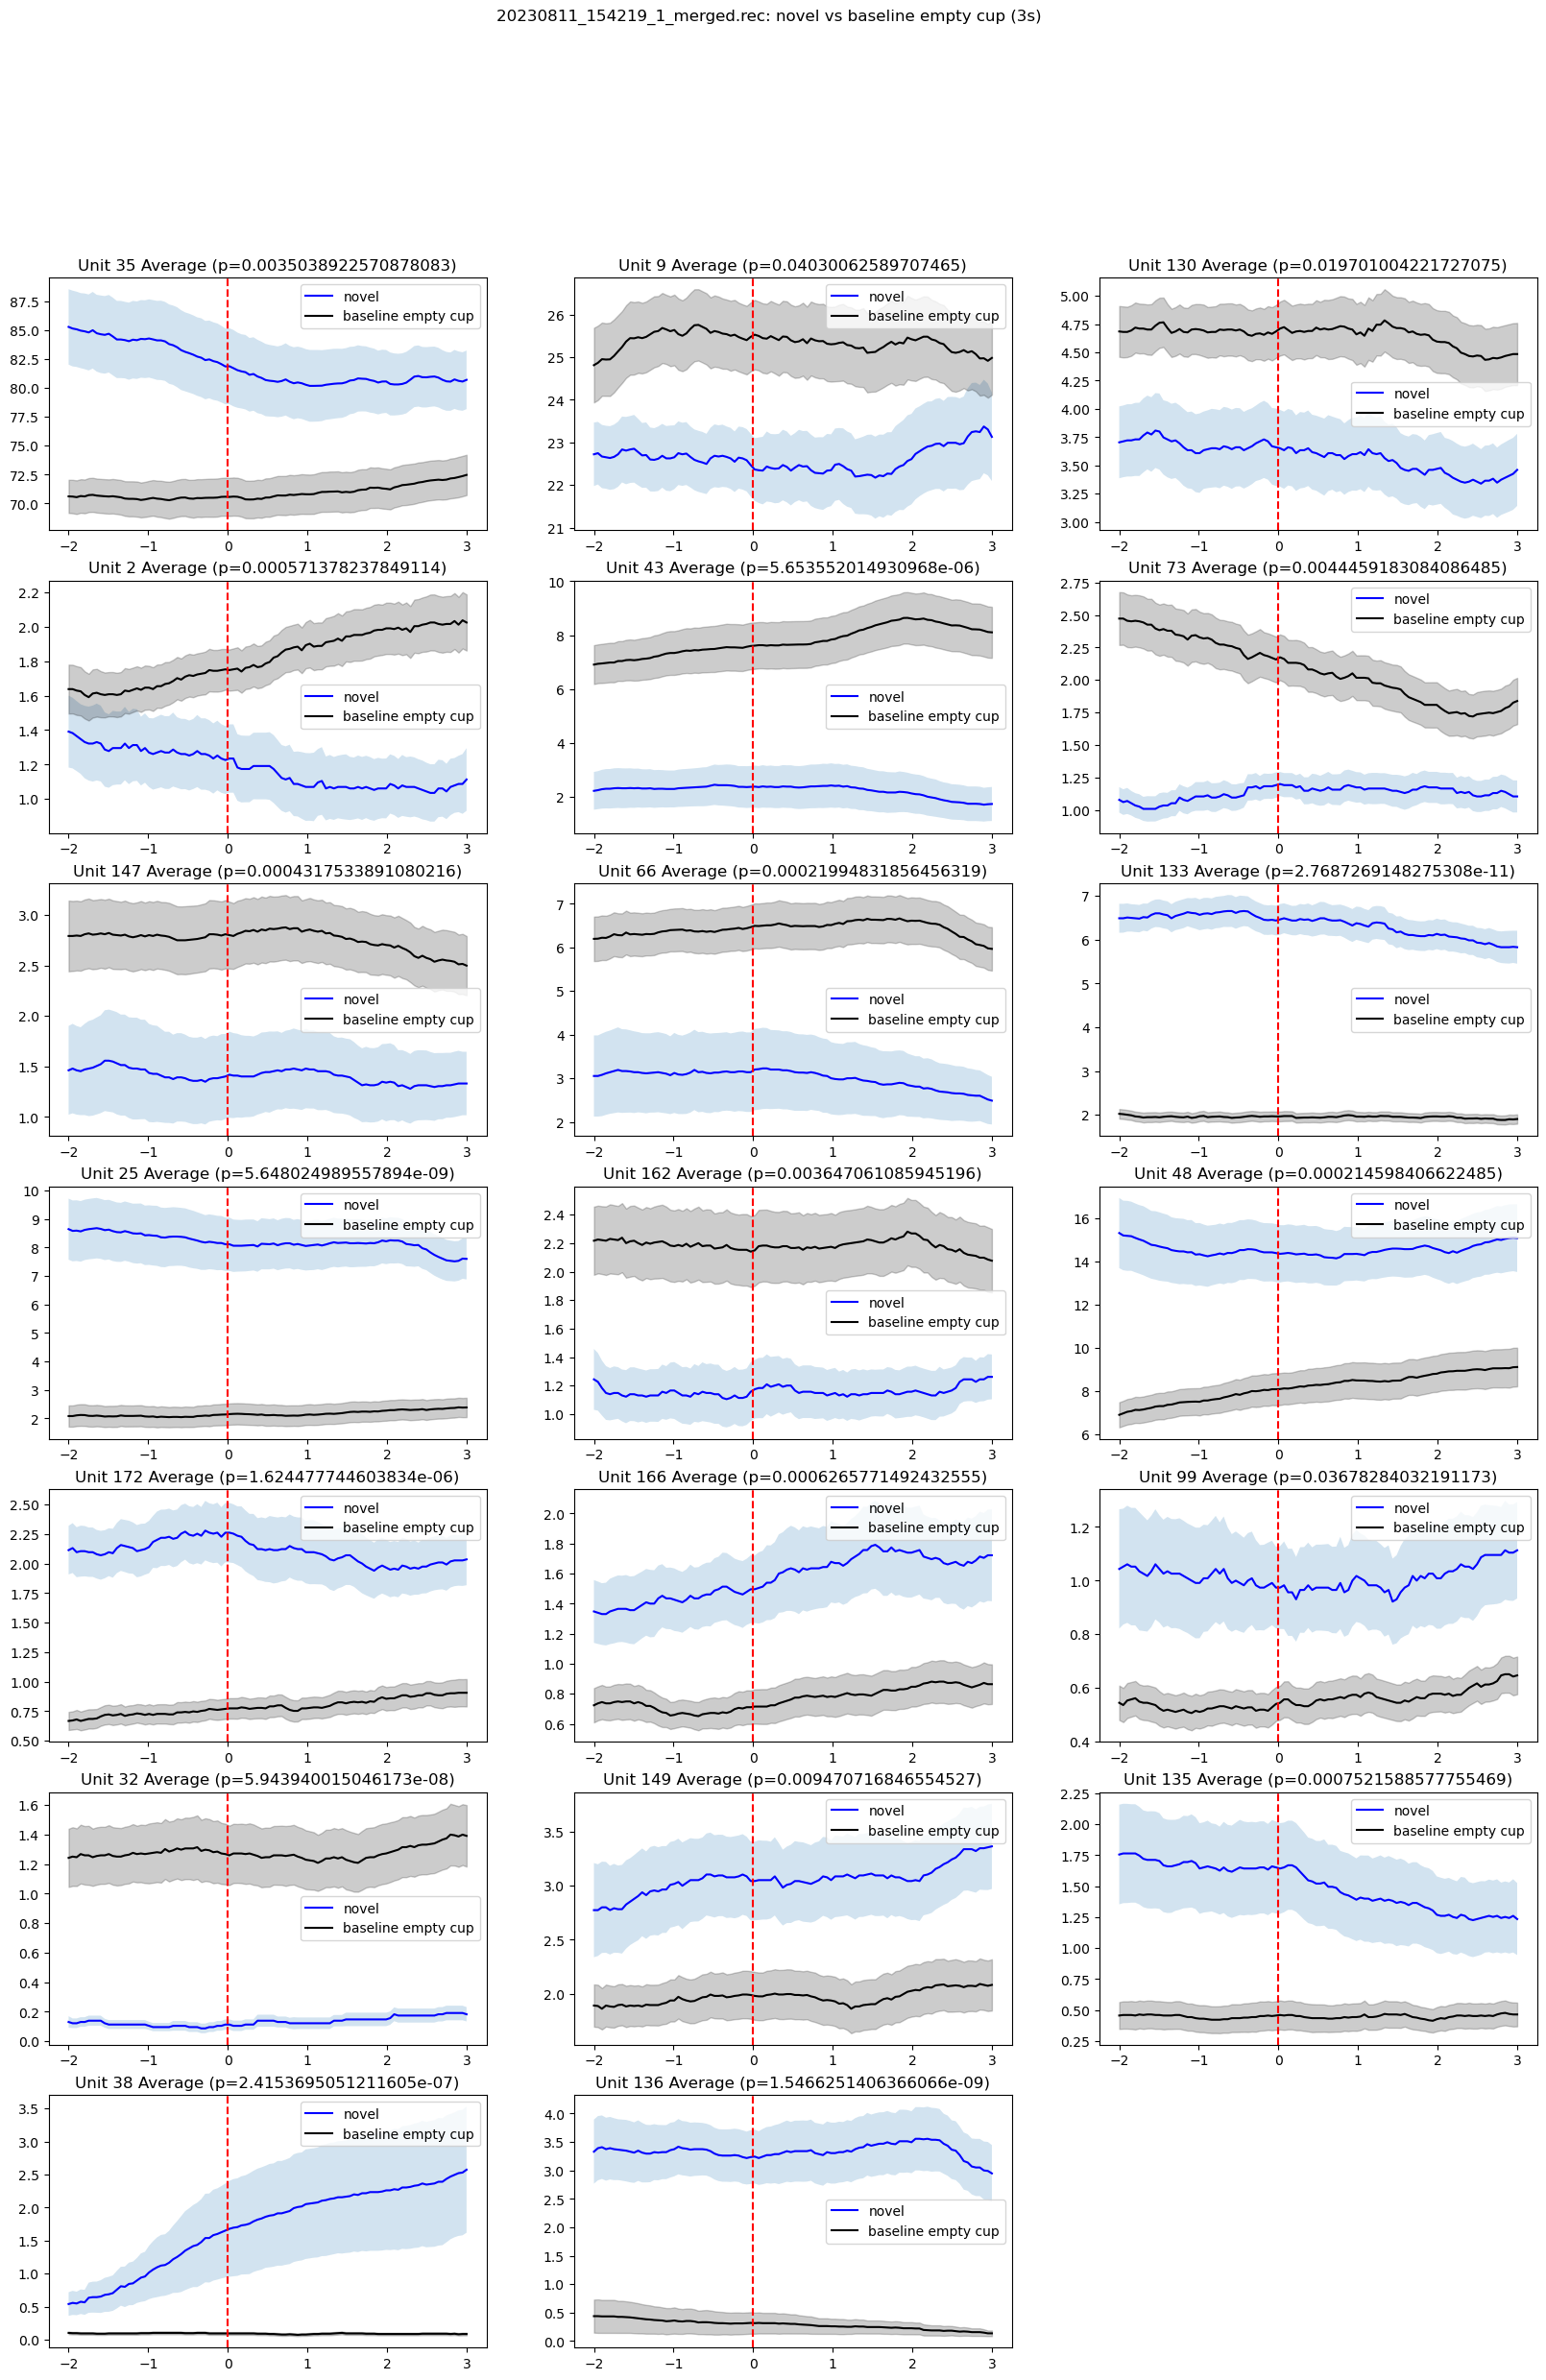

In [140]:
phase3_analysis.wilcox_event_v_event_collection('novel', 'baseline empty cup', 3, 2, save = True)
phase3_analysis.wilcox_event_v_event_collection('cagemate', 'baseline empty cup', 3, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('familiar', 'baseline empty cup', 3, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('acquisition', 'baseline empty cup', 3, 2, plot = False, save = True)
#phase3_analysis.wilcox_event_v_event_collection('cagemate', 'familiar', 5, 2, plot = False, save = True)

<Figure size 2000x0 with 0 Axes>

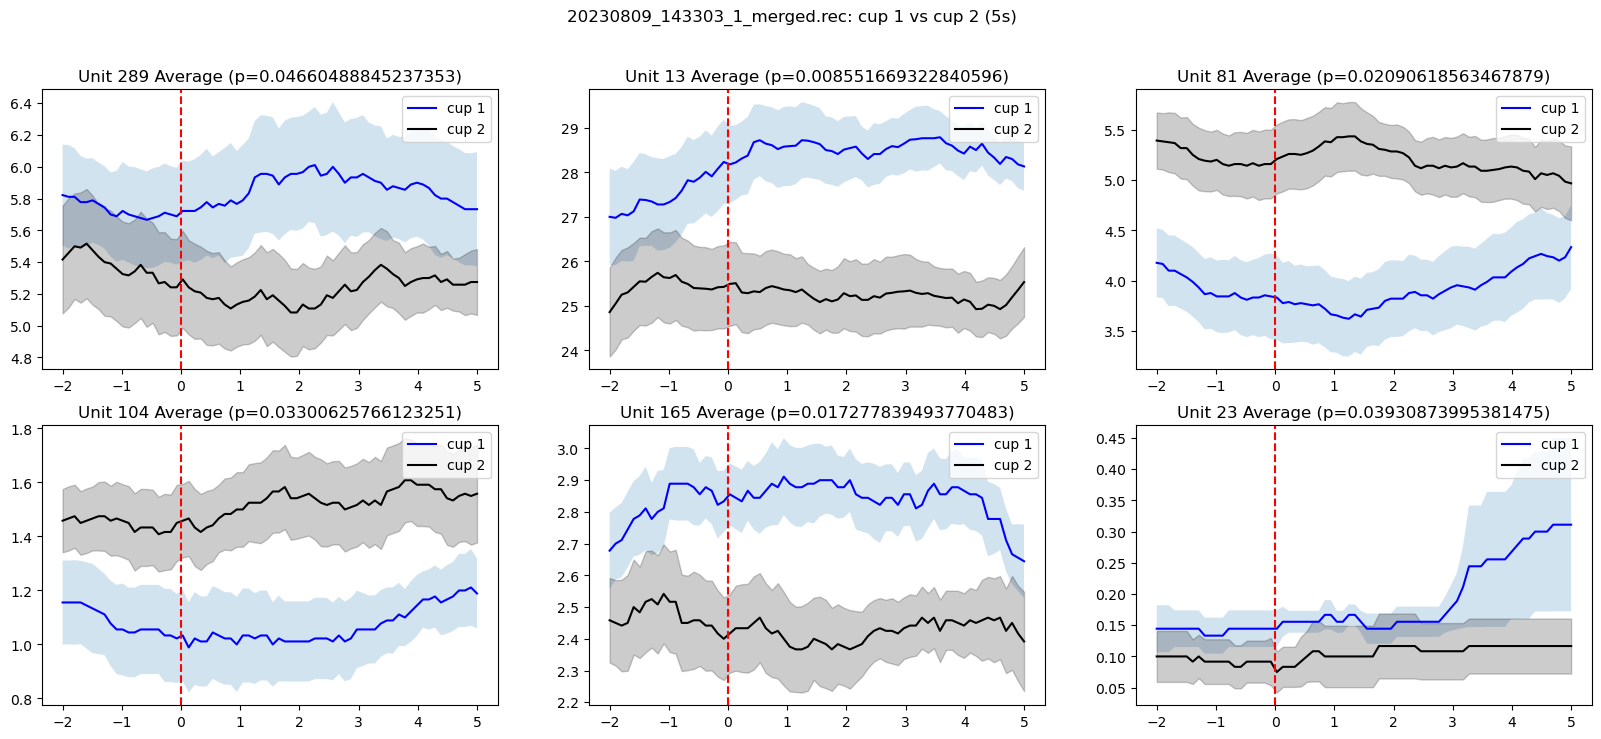

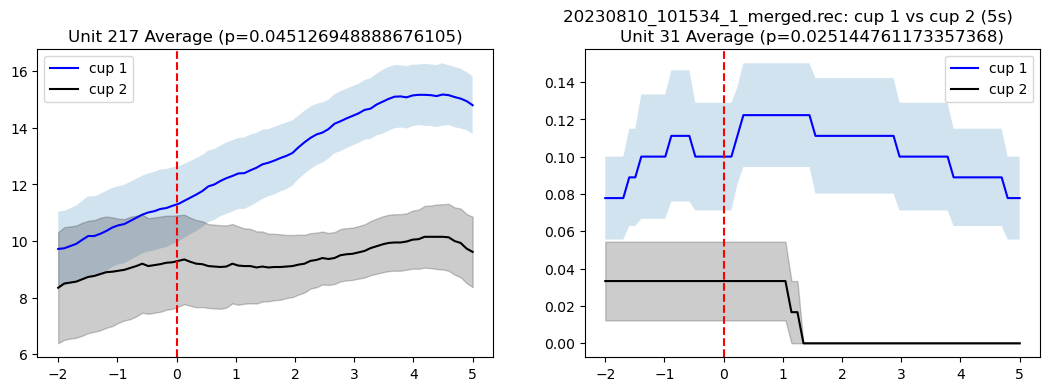

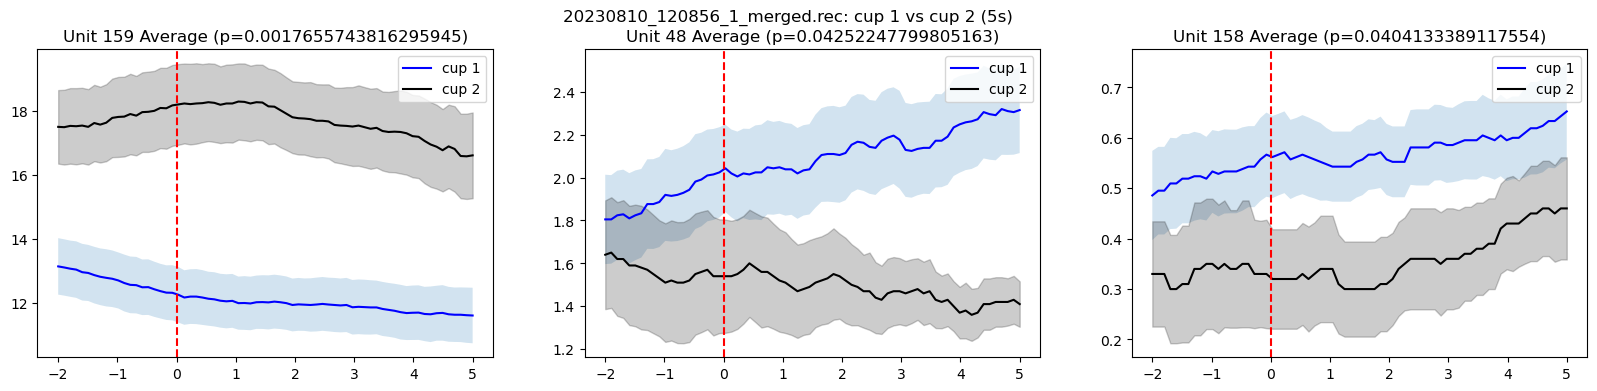

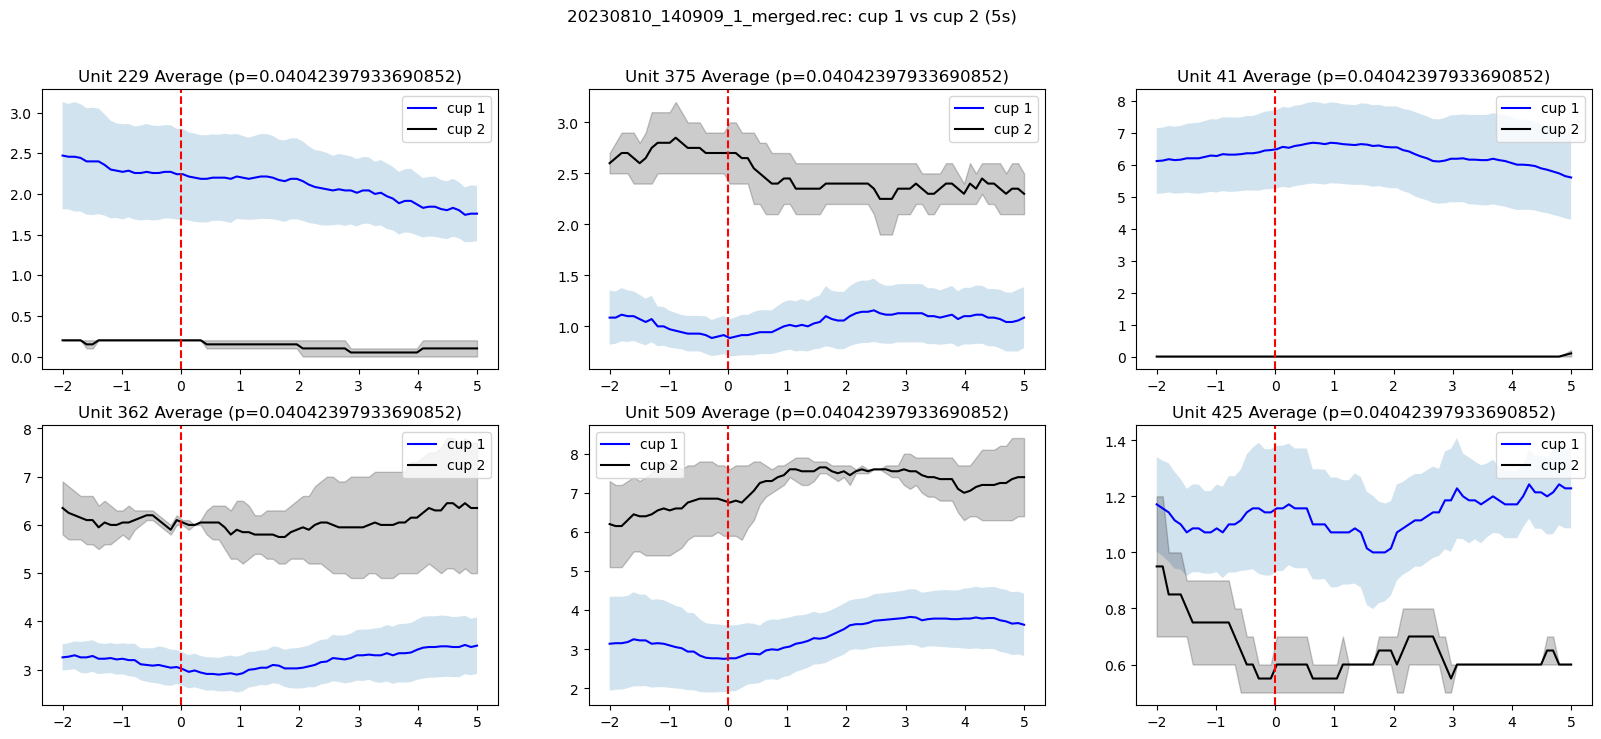

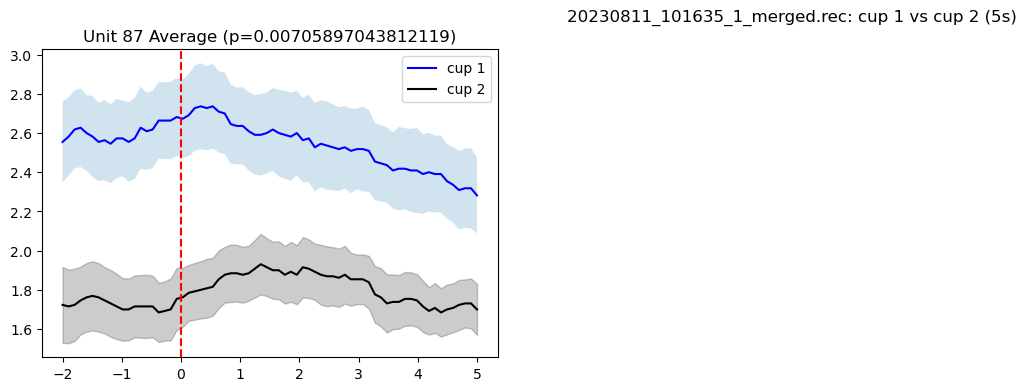

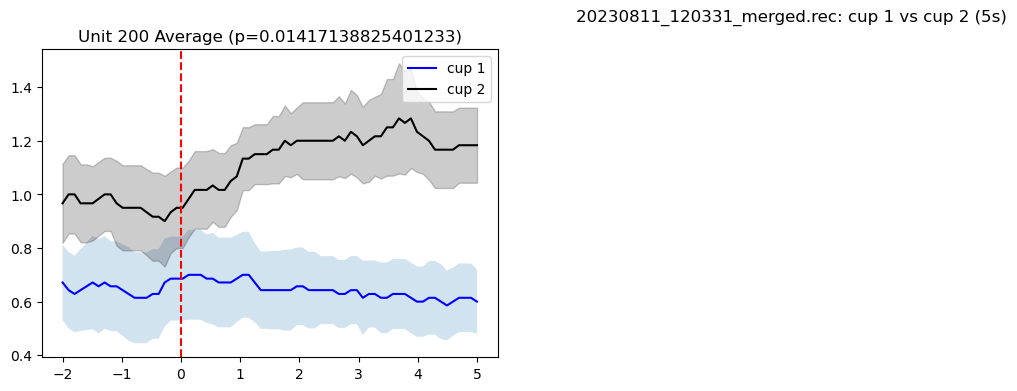

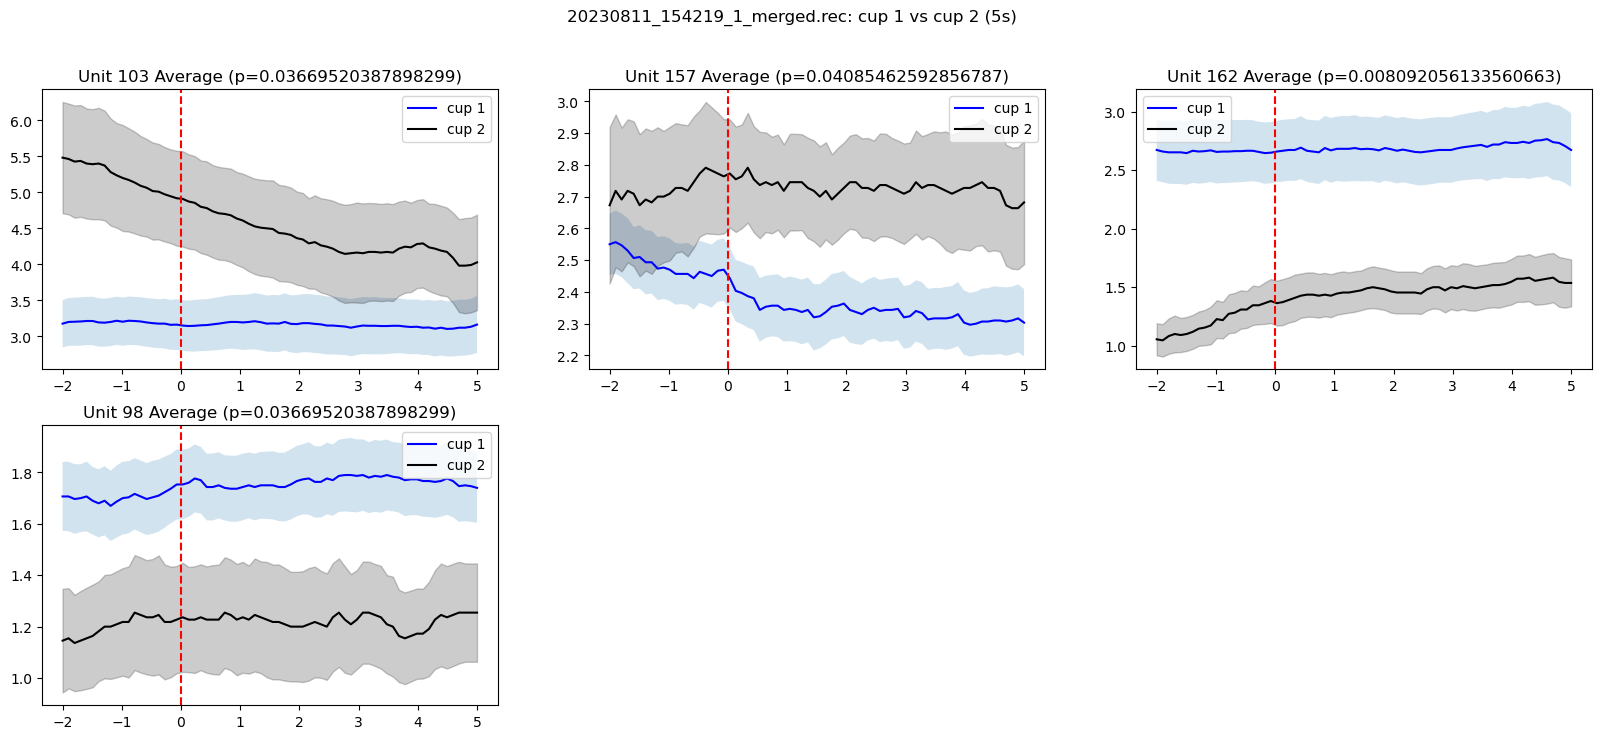

In [38]:
phase3_analysis.wilcox_event_v_event_collection('cup 1', 'cup 2', 5 ,2)

In [39]:
phase3_analysis.export()

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


No z-scored events saved.
No fishers exact tests saved


In [40]:
phase3_analysis_250sw = spike.SpikeAnalysis_MultiRecording(phase3_collection, 100, 50, 0.5)


All set to analyze


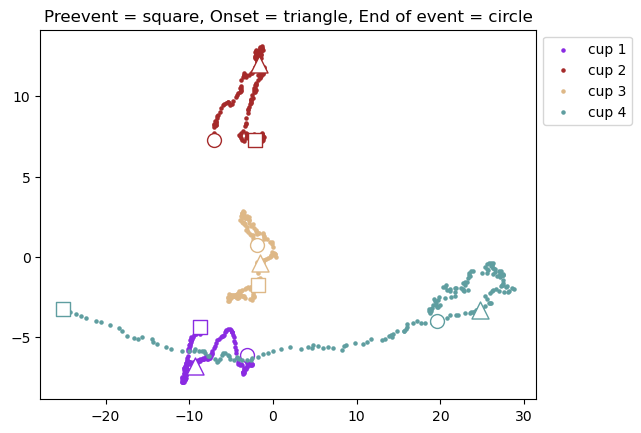

In [41]:
phase3_analysis_250sw.PCA_trajectories(5 ,5, events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'])

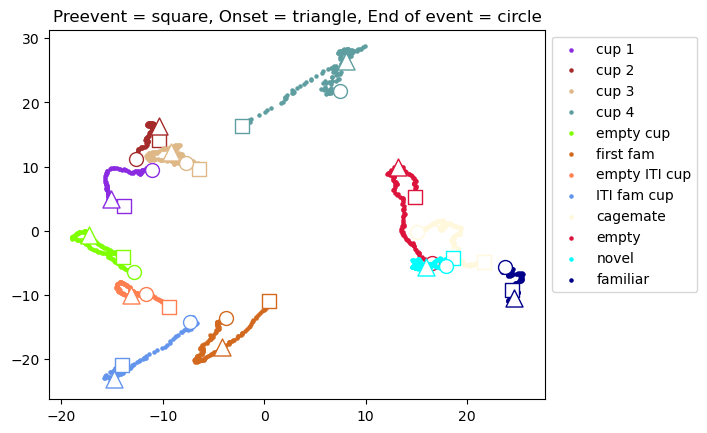

In [42]:
phase3_analysis_250sw.PCA_trajectories(5,2)

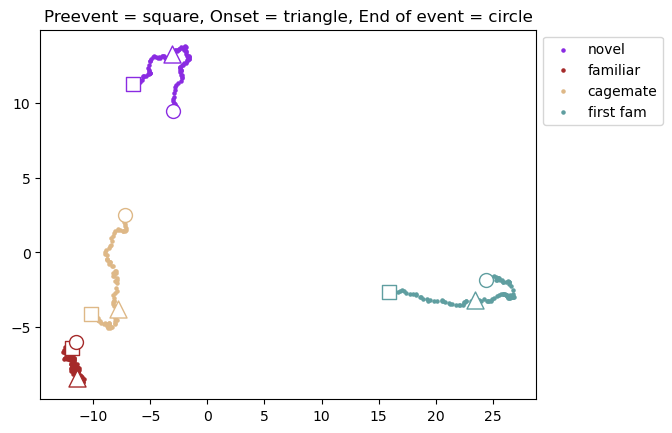

In [43]:
phase3_analysis_250sw.PCA_trajectories(3 ,2, events = ['novel', 'familiar', 'cagemate', 'first fam'])

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


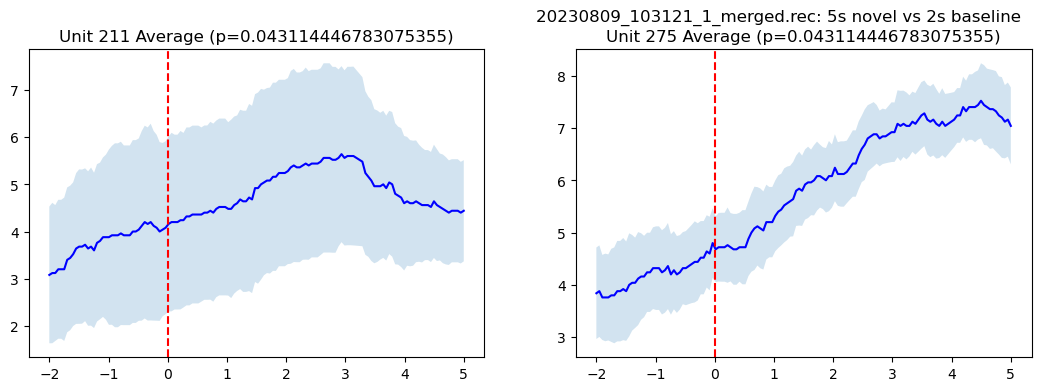

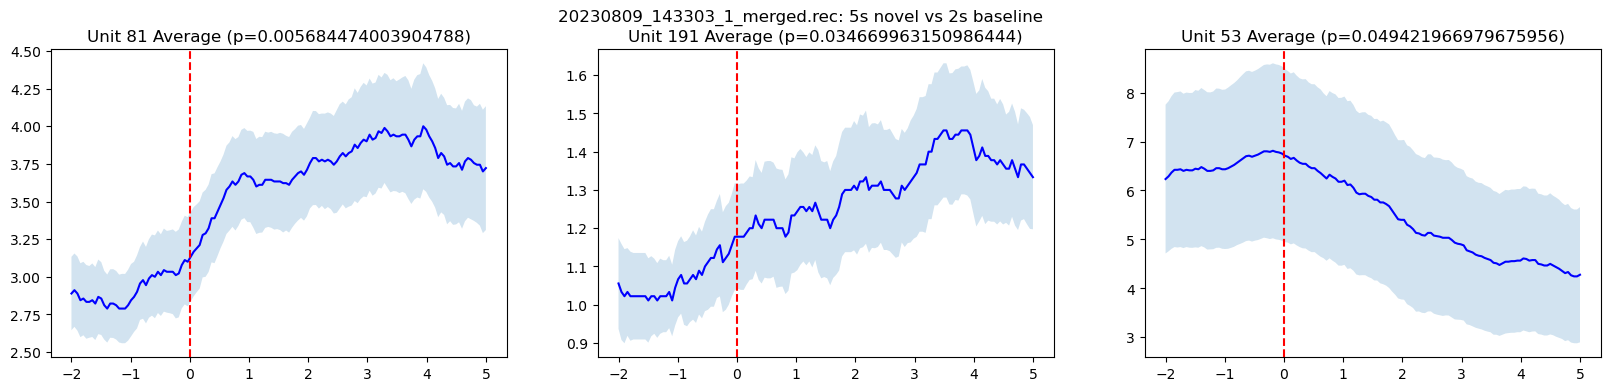

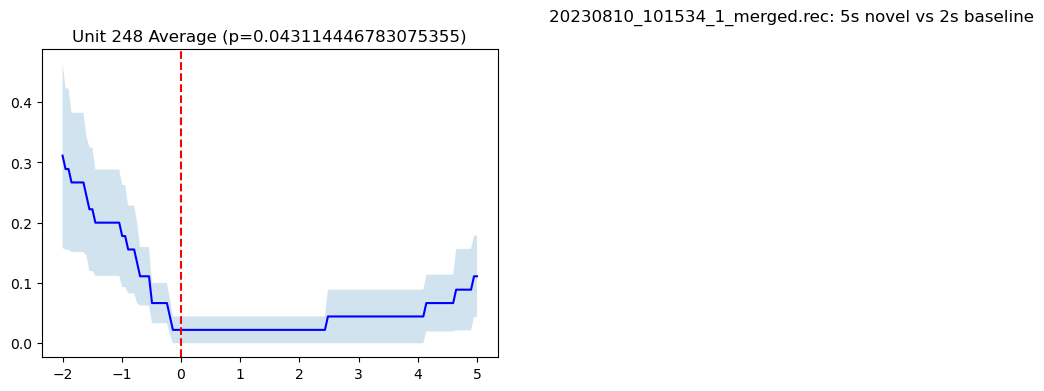

<Figure size 2000x0 with 0 Axes>

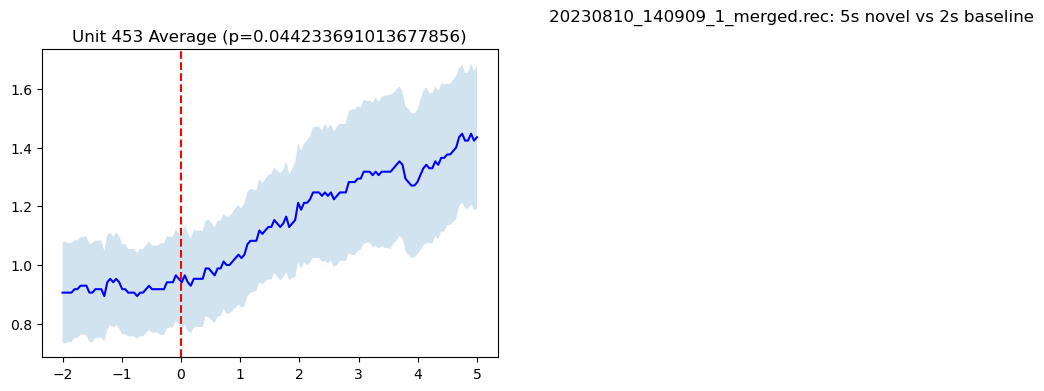

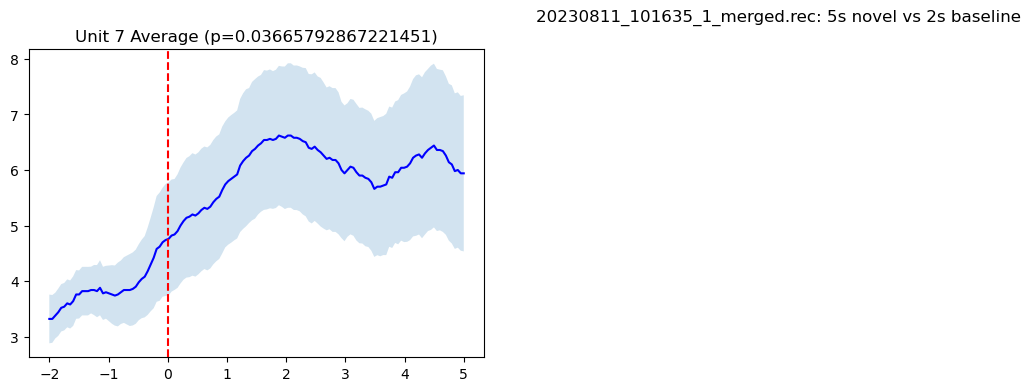

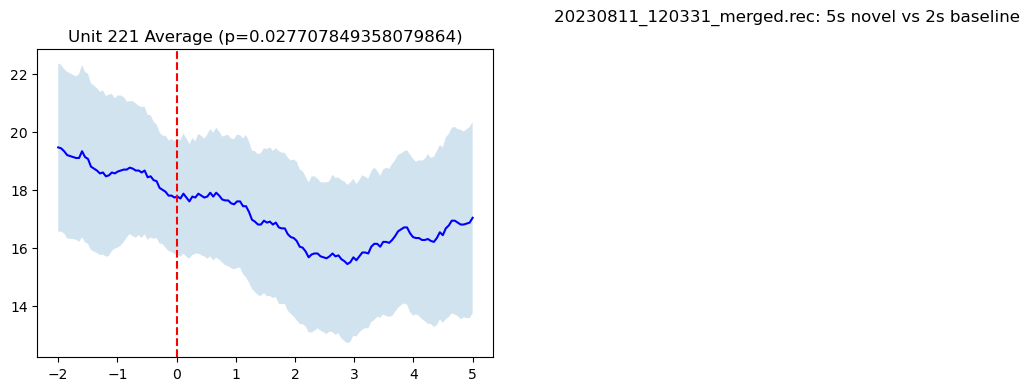

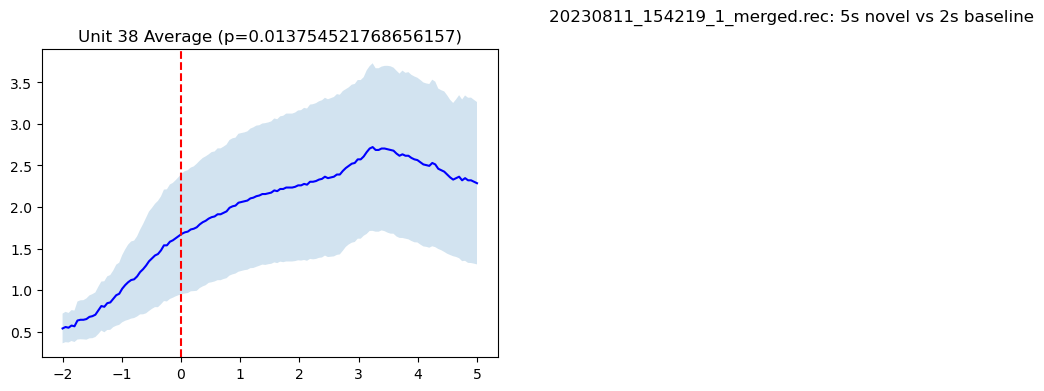

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293            2.0  0.138011  not significant   
1                  80            5.0  0.500184  not significant   
2                 252            4.0  0.715001  not significant   
3                 211            0.0  0.043114        decreases   
4                 276            3.0  0.224916  not significant   
..                ...            ...       ...              ...   
177                76          104.0  0.301085  not significant   
178               149          113.0  0.447031  not significant   
179               135          104.0  0.301085  not significant   
180                38           57.0  0.013755        increases   
181               136          137.0  0.975736  not significant   

                        Recording Subject                    Event  
0    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
1    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
2    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
3    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
4    20230809_103121_1_merged.rec     1.1  5s novel vs 2s baseline  
..                            ...     ...                      ...  
177  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
178  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
179  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
180  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  
181  20230811_154219_1_merged.rec     1.4  5s novel vs 2s baseline  

[182 rows x 7 columns]

In [44]:
phase3_analysis_250sw.wilcox_baseline_v_event_collection('novel', 2, 5)

In [45]:
event_info = {}
for recording_name, recording in phase3_collection.collection.items():
    event_dict_keys = recording.event_dict.keys()
    for event, events in recording.event_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for sniff in events:
            sniff_length_temp = sniff[1] - sniff[0]
            sniff_length = sniff_length +sniff_length_temp
        total_sniff_time = sniff_length/1000
        avg_event = sniff_length/no_events/1000
        if (recording_name + recording.subject) in event_info.keys():
            dict_event = event_info[recording_name + recording.subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[recording_name + recording.subject] =  dict_event
        else:
            event_info[recording_name + recording.subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}


In [46]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview

level_0     level_1       cup 1       cup 2  \
0   20230809_103121_1_merged.rec1.1   no_events    9.000000    9.000000   
1   20230809_103121_1_merged.rec1.1   avg event    5.192667    3.829778   
2   20230809_103121_1_merged.rec1.1  total time   46.734000   34.468000   
3   20230809_143303_1_merged.rec1.4   no_events    9.000000   12.000000   
4   20230809_143303_1_merged.rec1.4   avg event    2.711222    2.180583   
5   20230809_143303_1_merged.rec1.4  total time   24.401000   26.167000   
6   20230810_101534_1_merged.rec1.1   no_events    9.000000    6.000000   
7   20230810_101534_1_merged.rec1.1   avg event    8.311000    5.405500   
8   20230810_101534_1_merged.rec1.1  total time   74.799000   32.433000   
9   20230810_120856_1_merged.rec1.2   no_events   21.000000   10.000000   
10  20230810_120856_1_merged.rec1.2   avg event    4.901524    3.533500   
11  20230810_120856_1_merged.rec1.2  total time  102.932000   35.335000   
12  20230810_140909_1_merged.rec1.4   no_events    7.000000    2.000000   
13  20230810_140909_1_merged.rec1.4   avg event    1.413143    2.328500   
14  20230810_140909_1_merged.rec1.4  total time    9.892000    4.657000   
15  20230811_101635_1_merged.rec1.1   no_events   11.000000   13.000000   
16  20230811_101635_1_merged.rec1.1   avg event    4.681727    9.486923   
17  20230811_101635_1_merged.rec1.1  total time   51.499000  123.330000   
18    20230811_120331_merged.rec1.2   no_events    8.000000    6.000000   
19    20230811_120331_merged.rec1.2   avg event    3.708250    3.172000   
20    20230811_120331_merged.rec1.2  total time   29.666000   19.032000   
21  20230811_154219_1_merged.rec1.4   no_events   30.000000   11.000000   
22  20230811_154219_1_merged.rec1.4   avg event    3.133300    2.760545   
23  20230811_154219_1_merged.rec1.4  total time   93.999000   30.366000   

         cup 3      cup 4   empty cup   first fam  empty ITI cup  ITI fam cup  \
0     5.000000  14.000000   18.000000    9.000000      24.000000     6.000000   
1     8.286400   5.592786    3.838778    6.781556       7.015167     6.683333   
2    41.432000  78.299000   69.098000   61.034000     168.364000    40.100000   
3     8.000000   8.000000   17.000000   22.000000      13.000000    15.000000   
4     4.900000   2.574875    2.780471   10.456091       3.033538     8.169000   
5    39.200000  20.599000   47.268000  230.034000      39.436000   122.535000   
6    13.000000  11.000000   23.000000   31.000000      29.000000    20.000000   
7     3.005000   3.733273    4.484043    6.177097       4.802207     4.523250   
8    39.065000  41.066000  103.133000  191.490000     139.264000    90.465000   
9    10.000000   9.000000   20.000000   10.000000       8.000000    32.000000   
10    3.209900   4.433333    3.683350    9.456400       4.633250     6.571594   
11   32.099000  39.900000   73.667000   94.564000      37.066000   210.291000   
12    3.000000  15.000000    7.000000   16.000000      15.000000    11.000000   
13    0.583000   1.805067    1.184857    2.188625       1.390333     2.620364   
14    1.749000  27.076000    8.294000   35.018000      20.855000    28.824000   
15   16.000000   6.000000   20.000000   15.000000      22.000000    13.000000   
16    6.727125   4.927833    3.969850   10.562333       6.163591    11.541154   
17  107.634000  29.567000   79.397000  158.435000     135.599000   150.035000   
18   11.000000  17.000000   18.000000   16.000000      24.000000    15.000000   
19    4.026818   4.319294    2.475833    5.462313       3.689875     3.935133   
20   44.295000  73.428000   44.565000   87.397000      88.557000    59.027000   
21    5.000000   1.000000   21.000000    8.000000      28.000000     4.000000   
22    2.293600   2.800000    2.749238    3.596125       2.572679     5.116500   
23   11.468000   2.800000   57.734000   28.769000      72.035000    20.466000   

      cagemate      empty      novel    familiar  
0    20.000000   5.000000   5.000000    4.000000  
1     9.043300   2.21320

In [47]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_total_time_averages = {}
for event in event_dict_keys:
    avg_event = event_total_time[event].mean()
    if (event == 'empty cup') | (event == 'empty ITI cup'):    
        event_total_time_averages[event] = avg_event/3
    else:
        event_total_time_averages[event] = avg_event
event_total_time_averages

{'cup 1': 54.24025000000001,
 'cup 2': 38.22350000000001,
 'cup 3': 39.61775,
 'cup 4': 39.091875,
 'empty cup': 20.13149999999998,
 'first fam': 110.84262500000001,
 'empty ITI cup': 29.215666666666664,
 'ITI fam cup': 90.21787499999999,
 'cagemate': 102.22250000000022,
 'empty': 16.351000000000088,
 'novel': 57.304874999999974,
 'familiar': 48.340749999999915}

In [48]:
import matplotlib.pyplot as plt
colors = ['#9a9896', '#9a9896', '#9a9896', '#9a9896', '#9a9896', '#Bb005d', '#9a9896', '#A8778f', '#6401e8','#9a9896',
'#01e852', '#Bb005d']

Text(0, 0.5, 'Total sniff (s)')

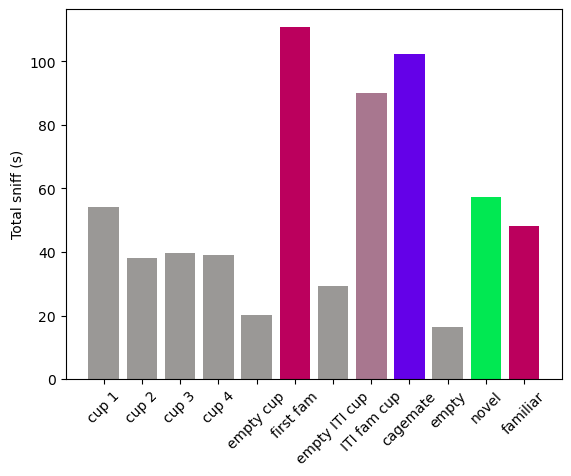

In [49]:
plt.bar(event_total_time_averages.keys(), event_total_time_averages.values(), color = colors)
plt.xticks(rotation=45)
plt.ylabel('Total sniff (s)')

In [50]:
for event in ['novel', 'familiar', 'first fam']:    
    phase3_analysis_250sw.wilcox_baseline_v_event_collection(event, 2,3, plot=False, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

In [51]:
 phase3_analysis_250sw.wilcox_baseline_v_event_collection('empty', 2,5, plot=False)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [ ]:
phase3_analysis_250sw.wilcox_baseline_v_event_collection('cagemate', 2, 3, plot = False, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293           83.0  0.629162  not significant   
1                  80           55.0  0.107466  not significant   
2                 252           53.0  0.156955  not significant   
3                 211           66.0  0.243201  not significant   
4                 276           15.5  0.001376        increases   
..                ...            ...       ...              ...   
177                76           12.0  0.400814  not significant   
178               149           11.0  0.326989  not significant   
179               135            7.0  0.463071  not significant   
180                38            9.0  0.207578  not significant   
181               136           16.0  0.779435  not significant   

                        Recording Subject                       Event  
0    20230809_103121_1_merged.rec     1.1  3s cagemate vs 2s baseline  
1    20230809_103121_1_merged.rec     1.1  3s cagemate vs 2s baseline  
2    20230809_103121_1_merged.rec     1.1  3s cagemate vs 2s baseline  
3    20230809_103121_1_merged.rec     1.1  3s cagemate vs 2s baseline  
4    20230809_103121_1_merged.rec     1.1  3s cagemate vs 2s baseline  
..                            ...     ...                         ...  
177  20230811_154219_1_merged.rec     1.4  3s cagemate vs 2s baseline  
178  20230811_154219_1_merged.rec     1.4  3s cagemate vs 2s baseline  
179  20230811_154219_1_merged.rec     1.4  3s cagemate vs 2s baseline  
180  20230811_154219_1_merged.rec     1.4  3s cagemate vs 2s baseline  
181  20230811_154219_1_merged.rec     1.4  3s cagemate vs 2s baseline  

[182 rows x 7 columns]

In [ ]:
phase3_analysis_250sw.export()

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


No z-scored events saved.


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  for name, df in self.ephyscollection.wilcox_dfs.items():
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  for name, df in self.ephyscollection.wilcox_dfs.items():
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will rais

No fishers exact tests saved


In [ ]:
phase3_analysis_250sw.wilcox_event_v_event_collection('familiar', 'cagemate', 3, 2 , plot = False, save = True)
phase3_analysis_250sw.wilcox_event_v_event_collection('familiar', 'novel', 3, 2 , plot = False, save = True)
phase3_analysis_250sw.wilcox_event_v_event_collection('cagemate', 'novel', 3, 2 , plot = False, save = True)

phase3_analysis_250sw.wilcox_event_v_event_collection('first fam', 'novel', 3, 2 , plot = False, save = True)
phase3_analysis_250sw.wilcox_event_v_event_collection('first fam', 'familiar', 3, 2 , plot = False, save = True)


In [ ]:
phase3_analysis_250sw.export()

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


No z-scored events saved.


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  for name, df in self.ephyscollection.wilcox_dfs.items():
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  for name, df in self.ephyscollection.wilcox_dfs.items():
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1256: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Wilcoxon Stat_x', 'p value_x', 'Event_x', 'event1 vs event2_x'} in the result is deprecated and will rais

No fishers exact tests saved


In [ ]:
wilcoxon_results = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\id_vs_fam.xlsx")
wilcoxon_results


recall vs cagemate  recall vs novel cagemate vs novel  \
0      not significant  not significant   not significant   
1      not significant  not significant   not significant   
2            decreases  not significant   not significant   
3      not significant  not significant   not significant   
4      not significant  not significant   not significant   
..                 ...              ...               ...   
177    not significant  not significant   not significant   
178    not significant  not significant   not significant   
179          increases  not significant         decreases   
180          decreases        decreases   not significant   
181    not significant  not significant   not significant   

    acquisition vs novel acquisition vs recall  
0        not significant       not significant  
1        not significant             decreases  
2        not significant       not significant  
3        not significant             increases  
4              decreases       not significant  
..                   ...                   ...  
177      not significant       not significant  
178            decreases       not significant  
179      not significant       not significant  
180      not significant       not significant  
181            decreases             decreases  

[182 rows x 5 columns]

In [ ]:


def get_fam_score(acquisition_vs_novel, recall_vs_cagemate, recall_vs_novel, cagemate_vs_novel, acquisition_vs_recall, id_score):
    fam_score = 0
    if acquisition_vs_novel == 'not significant':
        if recall_vs_cagemate != 'not significant':
            fam_score +=1
        if recall_vs_novel != 'not significant':
            fam_score +=1
        if cagemate_vs_novel != 'not significant':
            fam_score +=2
        if (id_score != 0):
            if id_score == 'familiarity?':
                fam_score = fam_score
            else:
                fam_score += (-2)
        if acquisition_vs_recall != 'not significant':
            fam_score += 1
    return fam_score

def get_id_score(acquisition_vs_novel, recall_vs_cagemate, recall_vs_novel, cagemate_vs_novel, acquisition_vs_recall):
    id_score = 0
    if acquisition_vs_recall == 'not significant':
        if (recall_vs_cagemate != 'not significant') & (cagemate_vs_novel != 'not significant'):
                id_score = 'cagemate'
        if (recall_vs_novel != 'not significant') & (recall_vs_cagemate != 'not significant'):
                id_score = 'familiar'
        if (recall_vs_novel != 'not significant') & (cagemate_vs_novel != 'not significant'):
                id_score = 'novel'
        if (recall_vs_novel != 'not significant') & (cagemate_vs_novel != 'not significant') & (recall_vs_cagemate != 'not significant'):
             id_score = 'familiarity?'
    if acquisition_vs_recall != 'not significant':
         if (recall_vs_novel != 'not significant') & (recall_vs_cagemate != 'not significant'):
                id_score = 'recall'
    return id_score


In [ ]:
wilcoxon_results['id score'] = wilcoxon_results.apply(lambda row: get_id_score(row['acquisition vs novel'], row['recall vs cagemate'], row['recall vs novel'], row['cagemate vs novel'], row['acquisition vs recall']), axis = 1) 

wilcoxon_results['fam score'] = wilcoxon_results.apply(lambda row: get_fam_score(row['acquisition vs novel'], row['recall vs cagemate'], row['recall vs novel'], row['cagemate vs novel'], row['acquisition vs recall'], row['id score']), axis = 1) 

In [ ]:
ID_score = wilcoxon_results[(wilcoxon_results['id score'] != 0) & (wilcoxon_results['id score'] != 'familiarity?')]
ID_score

recall vs cagemate  recall vs novel cagemate vs novel  \
13           decreases  not significant         increases   
25     not significant        increases         increases   
65     not significant        increases         increases   
67           increases        decreases         decreases   
71           increases  not significant         decreases   
75           increases        increases   not significant   
76           increases        increases   not significant   
77           decreases        decreases   not significant   
79           decreases        decreases   not significant   
81           increases        increases   not significant   
138          increases        increases   not significant   
139          decreases  not significant         increases   
142          increases  not significant         decreases   
143          increases        increases   not significant   
148    not significant        decreases         decreases   
172          increases  not significant         decreases   
179          increases  not significant         decreases   
180          decreases        decreases   not significant   

    acquisition vs novel acquisition vs recall  id score  fam score  
13       not significant       not significant  cagemate          1  
25             increases       not significant     novel          0  
65             increases       not significant     novel          0  
67       not significant             increases    recall          3  
71       not significant       not significant  cagemate          1  
75       not significant             decreases    recall          1  
76       not significant             decreases    recall          1  
77       not significant             increases    recall          1  
79       not significant       not significant  familiar          0  
81       not significant             decreases    recall          1  
138      not significant             decreases    recall          1  
139      not significant       not significant  cagemate          1  
142            decreases       not significant  cagemate          0  
143      not significant       not significant  familiar          0  
148            decreases       not significant     novel          0  
172      not significant       not significant  cagemate          1  
179      not significant       not significant  cagemate          1  
180      not significant       not significant  familiar          0

In [ ]:
fam_df = wilcoxon_results[(wilcoxon_results['fam score'] > 1)]
len(fam_df)

13

In [ ]:
cagemate_df = ID_score[ID_score['id score'] == 'cagemate']   
len(cagemate_df)

6

In [ ]:
len(ID_score)

18

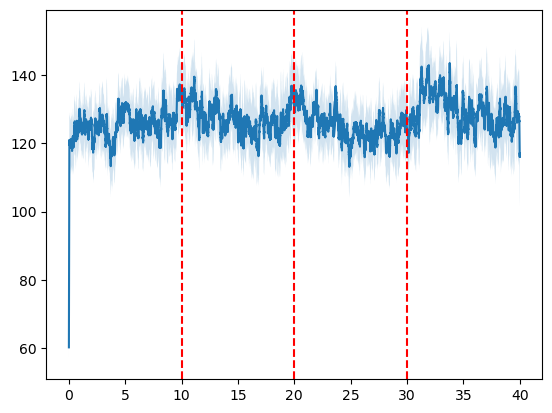

In [87]:
firing_rates = []
from scipy.stats import sem
for recording in phase3_analysis_250sw.ephyscollection.collection.values():
    firing_rate = spike.get_firing_rate(recording.spiketrain, phase3_analysis_250sw.smoothing_window, phase3_analysis.timebin)
   
    temp_firingrate = firing_rate[0:50128]
    firing_rates.append(temp_firingrate)

x = np.linspace(0, 40, num = 50128)
mean_arr = np.mean(firing_rates, axis = 0)
plt.plot(x, np.mean(firing_rates, axis = 0))
sem_arr = sem(firing_rates, axis=0)
plt.axvline(x=10, color='r', linestyle='--')
plt.axvline(x=20, color='r', linestyle='--')
plt.axvline(x=30, color='r', linestyle='--')
plt.fill_between(x, mean_arr-sem_arr, mean_arr+sem_arr, alpha=0.2)

In [184]:
phase3_analysis.wilcox_event_v_event_collection('novel', 'familiar', 3, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('novel', 'cagemate', 3, 2, plot = False, save = True)
phase3_analysis.wilcox_event_v_event_collection('cagemate', 'familiar', 3, 2, plot = False, save = True)

phase3_collection.wilcox_dfs.keys()

dict_keys(['5s novel vs 2s baseline', '5s familiar vs 2s baseline', '5s cagemate vs 2s baseline', '5s empty vs 2s baseline', 'novel vs empty (5s)', 'cagemate vs empty (5s)', 'familiar vs empty (5s)', 'novel vs familiar (5s)', 'cagemate vs familiar (5s)', '3s novel vs 2s baseline', '3s familiar vs 2s baseline', '3s first fam vs 2s baseline', 'novel vs baseline empty cup (3s)', 'cagemate vs baseline empty cup (3s)', 'familiar vs baseline empty cup (3s)', 'acquisition vs baseline empty cup (3s)', 'novel vs familiar (3s)', 'novel vs cagemate (3s)', 'cagemate vs familiar (3s)'])

In [188]:
df_list = []
for comparison in ['novel vs baseline empty cup (3s)',
                   'cagemate vs baseline empty cup (3s)',
                   'familiar vs baseline empty cup (3s)', 
                   'acquisition vs baseline empty cup (3s)',
                   'novel vs familiar (3s)',
                   'novel vs cagemate (3s)',
                   'cagemate vs familiar (3s)']:
    df = phase3_collection.wilcox_dfs[comparison]
    df_list.append(df)

is_first = True 
for df in df_list:
    if is_first:
        master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
    

master_df
#novel vs baseline

C:\Users\megha\AppData\Local\Temp\ipykernel_30996\3692634419.py:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
C:\Users\megha\AppData\Local\Temp\ipykernel_30996\3692634419.py:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')


Subject                     Recording  original unit id  \
0       1.1  20230809_103121_1_merged.rec               293   
1       1.1  20230809_103121_1_merged.rec                80   
2       1.1  20230809_103121_1_merged.rec               252   
3       1.1  20230809_103121_1_merged.rec               211   
4       1.1  20230809_103121_1_merged.rec               276   
..      ...                           ...               ...   
177     1.4  20230811_154219_1_merged.rec                76   
178     1.4  20230811_154219_1_merged.rec               149   
179     1.4  20230811_154219_1_merged.rec               135   
180     1.4  20230811_154219_1_merged.rec                38   
181     1.4  20230811_154219_1_merged.rec               136   

                              Event_x event1 vs event2_x  \
0    novel vs baseline empty cup (3s)    not significant   
1    novel vs baseline empty cup (3s)    not significant   
2    novel vs baseline empty cup (3s)    not significant   
3    novel vs baseline empty cup (3s)          decreases   
4    novel vs baseline empty cup (3s)          decreases   
..                                ...                ...   
177  novel vs baseline empty cup (3s)    not significant   
178  novel vs baseline empty cup (3s)          increases   
179  novel vs baseline empty cup (3s)          increases   
180  novel vs baseline empty cup (3s)          increases   
181  novel vs baseline empty cup (3s)          increases   

                                 Event_y event1 vs event2_y  \
0    cagemate vs baseline empty cup (3s)    not significant   
1    cagemate vs baseline empty cup (3s)          increases   
2    cagemate vs baseline empty cup (3s)    not significant   
3    cagemate vs baseline empty cup (3s)          decreases   
4    cagemate vs baseline empty cup (3s)          decreases   
..                                   ...                ...   
177  cagemate vs baseline empty cup (3s)    not significant   
178  cagemate vs baseline empty cup (3s)          increases   
179  cagemate vs baseline empty cup (3s)    not significant   
180  cagemate vs baseline empty cup (3s)          increases   
181  cagemate vs baseline empty cup (3s)          increases   

                                 Event_x event1 vs event2_x  \
0    familiar vs baseline empty cup (3s)    not significant   
1    familiar vs baseline empty cup (3s)          increases   
2    familiar vs baseline empty cup (3s)          decreases   
3    familiar vs baseline empty cup (3s)          decreases   
4    familiar vs baseline empty cup (3s)          decreases   
..                                   ...                ...   
177  familiar vs baseline empty cup (3s)    not significant   
178  familiar vs baseline empty cup (3s)    not significant   
179  familiar vs baseline empty cup (3s)          increases   
180  familiar vs baseline empty cup (3s)    not significant   
181  familiar vs baseline empty cup (3s)          increases   

                                    Event_y event1 vs event2_y  \
0    acquisition vs baseline empty cup (3s)    not significant   
1    acquisition vs baseline empty cup (3s)    not significant   
2    acquisition vs baseline empty cup (3s)    not significant   
3    acquisition vs baseline empty cup (3s)          decreases   
4    acquisition vs baseline empty cup (3s)          decreases   
..                                      ...                ...   
177  acquisition vs baseline empty cup (3s)    not significant   
178  acquisition vs baseline empty cup (3s)    not significant   
179  acquisition vs baseline empty cup (3s)    not significant   
180  acquisition vs baseline empty cup (3s)          increases   
181  acquisition vs baseline empty cup (3s)    not significant   

                    Event_x event1 vs event2_x                 Event_y  \
0    novel vs familiar (3s)    not significant  novel vs cagemate (3s)   
1    novel vs familiar (3s)    not significant  novel vs cagemate (3s) 

In [190]:
master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'novel vs baseline empty cup (3s)',
 'Event_y',
 'cagemate vs baseline empty cup (3s)',
 'Event_x',
 'familiar vs baseline empty cup (3s)',
 'Event_y',
 'acquisition vs baseline empty cup (3s)',
 'Event_x',
 'novel vs familiar (3s)',
 'Event_y',
 'novel vs cagemate (3s)',
 'Event',
 'cagemate vs familiar (3s)']
master_df = master_df[['original unit id',
 'novel vs baseline empty cup (3s)',
 'cagemate vs baseline empty cup (3s)',
 'familiar vs baseline empty cup (3s)',
 'acquisition vs baseline empty cup (3s)',
 'novel vs familiar (3s)',
 'novel vs cagemate (3s)',
 'cagemate vs familiar (3s)']]
master_df

original unit id novel vs baseline empty cup (3s)  \
0                 293                  not significant   
1                  80                  not significant   
2                 252                  not significant   
3                 211                        decreases   
4                 276                        decreases   
..                ...                              ...   
177                76                  not significant   
178               149                        increases   
179               135                        increases   
180                38                        increases   
181               136                        increases   

    cagemate vs baseline empty cup (3s) familiar vs baseline empty cup (3s)  \
0                       not significant                     not significant   
1                             increases                           increases   
2                       not significant                           decreases   
3                             decreases                           decreases   
4                             decreases                           decreases   
..                                  ...                                 ...   
177                     not significant                     not significant   
178                           increases                     not significant   
179                     not significant                           increases   
180                           increases                     not significant   
181                           increases                           increases   

    acquisition vs baseline empty cup (3s) novel vs familiar (3s)  \
0                          not significant        not significant   
1                          not significant        not significant   
2                          not significant        not significant   
3                                decreases        not significant   
4                                decreases        not significant   
..                                     ...                    ...   
177                        not significant        not significant   
178                        not significant        not significant   
179                        not significant        not significant   
180                              increases              increases   
181                        not significant        not significant   

    novel vs cagemate (3s) cagemate vs familiar (3s)  
0          not significant           not significant  
1          not significant           not significant  
2          not significant                 increases  
3          not significant           not significant  
4          not significant           not significant  
..                     ...                       ...  
177        not significant           not significant  
178        not significant           not significant  
179              increases                 decreases  
180        not significant                 increases  
181        not significant           not significant  

[182 rows x 8 columns]

In [191]:
def group_cells(novel, cagemate, fam, acquisition):
    group = ''
    if novel != 'not significant':
        group = 'novel'
    if cagemate != 'not significant':
        group = group + 'cagemate' 
    if fam != 'not significant':
        group = group + 'fam'
    if acquisition != 'not significant':
        group = group + 'acquisition'
    return group

master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline empty cup (3s)'],
                                                                  row['cagemate vs baseline empty cup (3s)'],
                                                                  row['familiar vs baseline empty cup (3s)'],
                                                                  row['acquisition vs baseline empty cup (3s)']), axis = 1)
results = master_df.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_30996\327116074.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline empty cup (3s)'],


original unit id  \
cell group                                      
                                           40   
acquisition                                18   
cagemate                                    8   
cagemateacquisition                         1   
cagematefam                                 4   
cagematefamacquisition                      5   
fam                                        15   
famacquisition                              7   
novel                                      10   
novelacquisition                            3   
novelcagemate                               4   
novelcagemateacquisition                    5   
novelcagematefam                           15   
novelcagematefamacquisition                30   
novelfam                                    5   
novelfamacquisition                        12   

                             novel vs baseline empty cup (3s)  \
cell group                                                      
                                                           40   
acquisition                                                18   
cagemate                                                    8   
cagemateacquisition                                         1   
cagematefam                                                 4   
cagematefamacquisition                                      5   
fam                                                        15   
famacquisition                                              7   
novel                                                      10   
novelacquisition                                            3   
novelcagemate                                               4   
novelcagemateacquisition                                    5   
novelcagematefam                                           15   
novelcagematefamacquisition                                30   
novelfam                                                    5   
novelfamacquisition                                        12   

                             cagemate vs baseline empty cup (3s)  \
cell group                                                         
                                                              40   
acquisition                                                   18   
cagemate                                                       8   
cagemateacquisition                                            1   
cagematefam                                                    4   
cagematefamacquisition                                         5   
fam                                                           15   
famacquisition                                                 7   
novel                                                         10   
novelacquisition                                               3   
novelcagemate                                                  4   
novelcagemateacquisition                                       5   
novelcagematefam                                              15   
novelcagematefamacquisition                                   30   
novelfam                                                       5   
novelfamacquisition                                           12   

                             familiar vs baseline empty cup (3s)  \
cell group                                                         
                                                              40   
acquisition                                                   18   
cagemate                                                       8   
cagemateacquisition                                            1   
cagematefam                                                    4   
cagematefamacquisition                                         5   
fam                                                           15   
famacquisition                                                 7   
novel                                                         10   
no

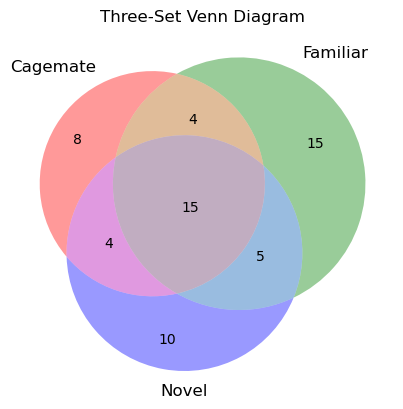

In [183]:

from matplotlib_venn import venn3  # For a three-set Venn diagram

# Define the sets (you can replace these with your own data)
overlap_counts = (8, 15, 4, 10, 4, 5, 15)

# Create the Venn diagram
venn3(subsets=overlap_counts, set_labels=('Cagemate', 'Familiar', 'Novel'))

# Add labels
# plt.text(0.35, 0.7, 'A', fontsize=12, va='center')
# plt.text(0.7, 0.7, 'B', fontsize=12, va='center')
# plt.text(0.5, 0.3, 'C', fontsize=12, va='center')
# plt.text(0.85, 0.3, 'E', fontsize=12, va='center')
# plt.text(0.57, 0.45, 'D', fontsize=12, va='center')
# plt.text(0.65, 0.15, 'F', fontsize=12, va='center')
# plt.text(0.75, 0.6, 'G', fontsize=12, va='center')
# plt.text(0.45, 0.15, 'H', fontsize=12, va='center')

# Display the Venn diagram
plt.title('Social Recognition Phase')
plt.show()




In [194]:
master_df = master_df[master_df['cell group'] != '']
master_df

original unit id novel vs baseline empty cup (3s)  \
1                  80                  not significant   
2                 252                  not significant   
3                 211                        decreases   
4                 276                        decreases   
5                 275                        decreases   
..                ...                              ...   
176                30                  not significant   
178               149                        increases   
179               135                        increases   
180                38                        increases   
181               136                        increases   

    cagemate vs baseline empty cup (3s) familiar vs baseline empty cup (3s)  \
1                             increases                           increases   
2                       not significant                           decreases   
3                             decreases                           decreases   
4                             decreases                           decreases   
5                             decreases                           decreases   
..                                  ...                                 ...   
176                     not significant                     not significant   
178                           increases                     not significant   
179                     not significant                           increases   
180                           increases                     not significant   
181                           increases                           increases   

    acquisition vs baseline empty cup (3s) novel vs familiar (3s)  \
1                          not significant        not significant   
2                          not significant        not significant   
3                                decreases        not significant   
4                                decreases        not significant   
5                                decreases        not significant   
..                                     ...                    ...   
176                              increases        not significant   
178                        not significant        not significant   
179                        not significant        not significant   
180                              increases              increases   
181                        not significant        not significant   

    novel vs cagemate (3s) cagemate vs familiar (3s)  \
1          not significant           not significant   
2          not significant                 increases   
3          not significant           not significant   
4          not significant           not significant   
5          not significant           not significant   
..                     ...                       ...   
176        not significant           not significant   
178        not significant           not significant   
179              increases                 decreases   
180        not significant                 increases   
181        not significant           not significant   

                      cell group  
1                    cagematefam  
2                            fam  
3    novelcagematefamacquisition  
4    novelcagematefamacquisition  
5    novelcagematefamacquisition  
..                           ...  
176                  acquisition  
178                novelcagemate  
179                     novelfam  
180     novelcagemateacquisition  
181             novelcagematefam  

[142 rows x 9 columns]

In [196]:
master_df[master_df['cell group'] == 'novelcagematefamacquisition']

original unit id novel vs baseline empty cup (3s)  \
3                 211                        decreases   
4                 276                        decreases   
5                 275                        decreases   
7                 184                        decreases   
9                 186                        increases   
23                 10                        decreases   
46                275                        increases   
55                275                        decreases   
57                 11                        decreases   
58                217                        decreases   
60                276                        decreases   
61                  6                        increases   
63                166                        increases   
66                 31                        increases   
67                159                        decreases   
69                142                        decreases   
79                153                        increases   
81                139                        increases   
86                 50                        increases   
114               234                        decreases   
119               409                        decreases   
122               279                        increases   
127                 7                        increases   
131                33                        increases   
132               106                        decreases   
134                49                        decreases   
136               249                        increases   
153                35                        increases   
164               133                        increases   
173                99                        increases   

    cagemate vs baseline empty cup (3s) familiar vs baseline empty cup (3s)  \
3                             decreases                           decreases   
4                             decreases                           decreases   
5                             decreases                           decreases   
7                             decreases                           decreases   
9                             increases                           increases   
23                            decreases                           decreases   
46                            increases                           increases   
55                            decreases                           decreases   
57                            decreases                           decreases   
58                            decreases                           decreases   
60                            decreases                           decreases   
61                            increases                           increases   
63                            increases                           increases   
66                            increases                           increases   
67                            decreases                           decreases   
69                            decreases                           decreases   
79                            increases                           increases   
81                            increases                           increases   
86                            increases                           increases   
114                           decreases                           decreases   
119                           decreases                           decreases   
122                           increases                           increases   
127                           increases                           increases   
131                           increases                           increases   
132                           decreases                           decreases   
134                           decreases                           decreases   
136                           increases                           increas

In [202]:
master_df[master_df['cell group'] == 'novelfam']

original unit id novel vs baseline empty cup (3s)  \
22                165                        increases   
111               453                        decreases   
147               195                        increases   
175                32                        decreases   
179               135                        increases   

    cagemate vs baseline empty cup (3s) familiar vs baseline empty cup (3s)  \
22                      not significant                           increases   
111                     not significant                           decreases   
147                     not significant                           increases   
175                     not significant                           decreases   
179                     not significant                           increases   

    acquisition vs baseline empty cup (3s) novel vs familiar (3s)  \
22                         not significant        not significant   
111                        not significant        not significant   
147                        not significant        not significant   
175                        not significant        not significant   
179                        not significant        not significant   

    novel vs cagemate (3s) cagemate vs familiar (3s) cell group  
22         not significant           not significant   novelfam  
111        not significant           not significant   novelfam  
147              increases                 decreases   novelfam  
175              decreases           not significant   novelfam  
179              increases                 decreases   novelfam